# Data import

In [1]:
import os
os.chdir("../")
%pwd

'd:\\college_work\\4th year\\Sem7th\\Project\\major-project\\Code\\Heart-Disease-Classification-with-Electrocardiogram'

In [2]:
    from sklearn.metrics import accuracy_score, classification_report
    from tensorflow.keras.utils import to_categorical
    from sklearn.preprocessing import StandardScaler
    import numpy as np
    #? augmented data with swt  
    X_train_aug = np.load("./artifacts/data_transformation/new_swt_Aug/X_train.npy")
    y_train_aug = np.load("./artifacts/data_transformation/new_swt_Aug/y_train.npy")
    X_test_aug = np.load("./artifacts/data_transformation/new_swt_Aug/X_test.npy")
    y_test_aug = np.load("./artifacts/data_transformation/new_swt_Aug/y_test.npy")
    X_val_aug = np.load("./artifacts/data_transformation/new_swt_Aug/X_val.npy")
    y_val_aug = np.load("./artifacts/data_transformation/new_swt_Aug/y_val.npy")

    print(f"size of X_train {X_train_aug.shape}, size of y_train{y_train_aug.shape}")
    # print(f"size of X_test {X_test_aug.shape}, size of y_test {y_test_aug.shape}")
    # print(f"size of X_val {X_val_aug.shape}, size of y_val {y_val_aug.shape}")

    X_train_aug_dl = X_train_aug
    y_train_aug_dl = to_categorical(y_train_aug,num_classes=5)
    X_test_aug_dl = X_test_aug
    X_val_aug_dl = X_val_aug
    y_test_aug_dl = to_categorical(y_test_aug,num_classes=5)
    y_val_aug_dl = to_categorical(y_val_aug,num_classes=5)

 
    sc = StandardScaler()
    X_train_aug_ml = X_train_aug.reshape(-1,12000)
    X_val_aug_ml = X_val_aug.reshape(-1,12000)
    X_test_aug_ml = X_test_aug.reshape(-1,12000)
    sc_tr = sc.fit(X_train_aug_ml)

    y_train_aug_ml = y_train_aug
    y_test_aug_ml = y_test_aug
    y_val_aug_ml = y_val_aug
    X_train_aug_ml = sc_tr.transform(X_train_aug_ml)
    X_val_aug_ml = sc_tr.transform(X_val_aug_ml)
    X_test_aug_ml = sc_tr.transform(X_test_aug_ml)

    print(np.unique(y_train_aug,return_counts=True))

    # # transformation of Trainig data for DL modesl
    # mean = np.mean(X_train_aug, axis=(0, 1)) 
    # std = np.std(X_train_aug, axis=(0, 1)) 
    # X_train_aug_dl = (X_train_aug - mean)/std

    # mean1 = np.mean(X_test_aug, axis=(0, 1)) 
    # std1 = np.std(X_test_aug, axis=(0, 1)) 
    # X_test_aug_dl = (X_test_aug - mean1)/std1

    # mean2 = np.mean(X_val_aug, axis=(0, 1)) 
    # std2 = np.std(X_val_aug, axis=(0, 1)) 
    # X_val_aug_dl = (X_val_aug - mean2)/std2

    X_train_aug_dl.shape


size of X_train (17957, 1000, 12), size of y_train(17957,)
(array([0, 1, 2, 3, 4], dtype=int64), array([7243, 4043, 2903, 2353, 1415], dtype=int64))


(17957, 1000, 12)

In [3]:
X_test_aug_dl.shape,X_test_aug_ml.shape

((1650, 1000, 12), (1650, 12000))

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load your ECG data and labels
ecg_data = X_train_aug_dl
labels = y_train_aug_ml

# Original shape: (num_samples, num_timesteps, num_channels)
num_samples, num_timesteps, num_channels = ecg_data.shape

# Reshape the data for the CNN
ecg_data = ecg_data.reshape(num_samples, num_timesteps, num_channels, 1)

# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(ecg_data, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(num_timesteps, num_channels)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Compile and train the CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# Extract features from the CNN model
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
train_features = feature_extractor.predict(train_data)
test_features = feature_extractor.predict(test_data)




Epoch 1/10
449/449 [==============================] - 22s 40ms/step - loss: 1.6135 - accuracy: 0.3763 - val_loss: 1.4627 - val_accuracy: 0.4123
Epoch 2/10
449/449 [==============================] - 18s 39ms/step - loss: 1.4650 - accuracy: 0.4223 - val_loss: 1.5723 - val_accuracy: 0.4190
Epoch 3/10
449/449 [==============================] - 18s 40ms/step - loss: 1.5990 - accuracy: 0.3048 - val_loss: 1.6094 - val_accuracy: 0.2726
Epoch 4/10
449/449 [==============================] - 18s 40ms/step - loss: 1.6094 - accuracy: 0.2717 - val_loss: 1.6094 - val_accuracy: 0.2726
Epoch 5/10
449/449 [==============================] - 18s 40ms/step - loss: 1.6094 - accuracy: 0.2717 - val_loss: 1.6094 - val_accuracy: 0.2726
Epoch 6/10
449/449 [==============================] - 18s 40ms/step - loss: 1.6094 - accuracy: 0.2717 - val_loss: 1.6094 - val_accuracy: 0.2726
Epoch 7/10
449/449 [==============================] - 18s 39ms/step - loss: 1.6094 - accuracy: 0.2717 - val_loss: 1.6094 - val_accuracy

NameError: name 'Model' is not defined

In [45]:
from keras.models import Sequential,Model
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
train_features = feature_extractor.predict(train_data)
test_features = feature_extractor.predict(test_data)

113/113 [==============================] - 1s 8ms/step


In [46]:
# Train ML models using the extracted features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)
rf_accuracy = rf.score(test_features, test_labels)
print(f"Random Forest Accuracy: {rf_accuracy}")

svm = SVC(kernel='rbf', gamma='auto', random_state=42)
svm.fit(train_features, train_labels)
svm_accuracy = svm.score(test_features, test_labels)
print(f"SVM Accuracy: {svm_accuracy}")

Random Forest Accuracy: 0.7942650334075724
SVM Accuracy: 0.5194877505567929


### Feature extraction multimodel [link](https://link.springer.com/article/10.1007/s13042-022-01718-0)

In [8]:
import numpy as np

def isbp(signal, radius=4):
    patterns = []
    for i in range(radius, len(signal)-radius):
        center = signal[i]
        neighbors = signal[i-radius:i] + signal[i+1:i+radius+1]
        pattern1 = [int(x >= center) for x in neighbors[:radius]]
        pattern2 = [int(j >= neighbors[radius+j]) for j in range(radius)]
        patterns.append(pattern1 + pattern2)
    
    hist1 = np.histogram(np.array(patterns), bins=range(2**(2*radius)))[0]
    hist2 = np.histogram([sum(2**i * d for i,d in enumerate(p)) for p in patterns], bins=range(2**(2*radius)))[0]
    return np.concatenate([hist1, hist2])

# Load your ECG dataset
ecg_data = X_test_aug_dl  # Assuming the data is in a numpy array with shape (12342, 1000, 12)

all_features = []

for sample in ecg_data:
    sample_features = []
    for lead in sample.T:  # Iterate over leads
        isbp_features = isbp(lead)
        sample_features.append(isbp_features)
    all_features.append(np.concatenate(sample_features))



IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
all_features = np.array(all_features)
print(all_features.shape)

#### CNN model


In [51]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Reshape, ZeroPadding1D
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# ecg_data = np.load('your_ecg_data.npy')
# labels = np.load('your_ecg_labels.npy')

# num_samples, num_timesteps, num_channels = ecg_data.shape

# train_data, test_data, train_labels, test_labels = train_test_split(ecg_data, labels, test_size=0.2, random_state=42)

# train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2], 1)
# test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], test_data.shape[2], 1)

# model1 = Sequential()
# model1.add(Conv1D(32, 3, activation='relu', input_shape=(num_timesteps, num_channels, 1)))
# model1.add(MaxPooling1D(2))
# model1.add(Conv1D(64, 3, activation='relu'))
# model1.add(MaxPooling1D(2))
# model1.add(Flatten())
# model1.add(Dense(128, activation='relu'))
# model1.add(Dense(64, activation='relu'))

# model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model1.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
train_features = feature_extractor.predict(train_data)
test_features = feature_extractor.predict(test_data)

input_shape = train_features.shape[1:]
input_layer = Input(shape=input_shape)
x = Reshape((input_shape[0], 1))(input_layer)
x = ZeroPadding1D(padding=1)(x)  # Add padding to the input
x = Conv1D(64, 5, activation='relu')(x)  # Change the kernel size
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)

model2 = Model(inputs=input_layer, outputs=output_layer)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_features, train_labels, epochs=50, batch_size=32, validation_data=(test_features, test_labels))

113/113 [==============================] - 1s 10ms/step
Epoch 1/50
449/449 [==============================] - 16s 21ms/step - loss: 1.3647 - accuracy: 0.4395 - val_loss: 1.3014 - val_accuracy: 0.4791
Epoch 2/50
449/449 [==============================] - 9s 20ms/step - loss: 1.2702 - accuracy: 0.4792 - val_loss: 1.2519 - val_accuracy: 0.5025
Epoch 3/50
449/449 [==============================] - 9s 20ms/step - loss: 1.2342 - accuracy: 0.4929 - val_loss: 1.2263 - val_accuracy: 0.5109
Epoch 4/50
449/449 [==============================] - 9s 20ms/step - loss: 1.2081 - accuracy: 0.5072 - val_loss: 1.2106 - val_accuracy: 0.5114
Epoch 5/50
449/449 [==============================] - 9s 20ms/step - loss: 1.1926 - accuracy: 0.5147 - val_loss: 1.2128 - val_accuracy: 0.5081
Epoch 6/50
449/449 [==============================] - 9s 21ms/step - loss: 1.1827 - accuracy: 0.5184 - val_loss: 1.2600 - val_accuracy: 0.4955
Epoch 7/50
449/449 [==============================] - 9s 20ms/step - loss: 1.1675 - a

In [52]:

# Define the second CNN model (using the extracted features and the provided architecture)
def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()

    model.add(Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))

    model.add(GlobalAveragePooling1D())
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation="softmax"))

    return model

input_shape = train_features.shape[1:]
num_classes = train_labels.max() + 1

model2 = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    roc_auc_score,
    categorical_accuracy,
    'accuracy',
    f1_score
]

model2.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)

history = model2.fit(
    train_features, tf.keras.utils.to_categorical(train_labels),
    epochs=10,
    validation_data=(test_features, tf.keras.utils.to_categorical(test_labels)),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/CNN-feature/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
    ],
)

ValueError: Input 0 of layer "conv1d_13" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 128)

In [4]:
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

ecg_data = X_val_aug_dl

num_samples, num_timesteps, num_channels = ecg_data.shape
reshaped_ecg_data = ecg_data.reshape(-1, num_timesteps * num_channels)

def extract_features(ecg_sample):
    features = []
    for channel in range(num_channels):
        channel_data = ecg_sample[channel::num_channels]
        channel_mean = np.mean(channel_data)
        channel_std = np.std(channel_data)
        channel_skew = skew(channel_data)
        channel_kurtosis = kurtosis(channel_data)
        features.extend([channel_mean, channel_std, channel_skew, channel_kurtosis])
    return np.array(features)

X = np.array([extract_features(sample) for sample in reshaped_ecg_data])

# y = np.load('your_ecg_labels.npy')
y = y_val_aug_ml

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# rfc.fit(X_train, y_train)

# accuracy = rfc.score(X_test, y_test)
# print(f"Accuracy: {accuracy}")
print(X.shape)

(1637, 48)


In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks

# Normalization or standardization
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Handling missing values
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X_scaled)

# # Noise filtering
# from scipy.signal import medfilt

# X_filtered = np.array([medfilt(ecg_sample, kernel_size=3) for ecg_sample in X_imputed])

def segment_ecg(ecg_sample):
    peaks, _ = find_peaks(ecg_sample, height=np.std(ecg_sample))
    peak_distances = np.diff(peaks)
    qrs_peak_indices = peaks[np.where(peak_distances > np.mean(peak_distances) + np.std(peak_distances))[0]]

    p_waves = []
    qrs_complexes = []
    t_waves = []

    for qrs_peak in qrs_peak_indices:
        start = max(0, qrs_peak - 50)
        end = min(len(ecg_sample), qrs_peak + 100)
        p_wave = ecg_sample[start:qrs_peak]
        qrs_complex = ecg_sample[qrs_peak:qrs_peak + 30]
        t_wave = ecg_sample[qrs_peak + 30:end]
        p_waves.append(p_wave)
        qrs_complexes.append(qrs_complex)
        t_waves.append(t_wave)

    return p_waves, qrs_complexes, t_waves

# segmented_ecg_data = [segment_ecg(ecg_sample) for ecg_sample in X_filtered]

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.signal import medfilt, find_peaks
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

ecg_data = X_train_aug_dl
labels = y_train_aug_ml

num_samples, num_timesteps, num_channels = ecg_data.shape
reshaped_ecg_data = ecg_data.reshape(-1, num_timesteps * num_channels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(reshaped_ecg_data)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

X_filtered = np.array([medfilt(ecg_sample, kernel_size=3) for ecg_sample in X_imputed])

print(X_filtered.shape)
segmented_ecg_data = [segment_ecg(ecg_sample) for ecg_sample in X_filtered]



(17957, 12000)


In [23]:
X_val_aug_ml.shape,labels.shape, X_test_aug_dl.shape

((1637, 12000), (17957,), (1650, 1000, 12))

In [34]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

ecg_data = X_test_aug_dl

num_samples, num_timesteps, num_channels = ecg_data.shape
reshaped_ecg_data = ecg_data.reshape(-1, num_timesteps * num_channels)

pt = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_ecg_data = pt.fit_transform(reshaped_ecg_data)

xx = np.array([extract_features(sample) for sample in transformed_ecg_data])

# X_filtered = transformed_ecg_data.reshape(num_samples, num_timesteps, num_channels)

In [40]:
X_filtered = xx.reshape(num_samples, num_timesteps, num_channels)

xx.shape

ValueError: cannot reshape array of size 79200 into shape (1650,1000,12)

In [32]:
X_filtered.shape,y_test_aug_ml.shape,reshaped_ecg_data.shape

((1650, 1000, 12), (1650,), (1650, 12000))

In [35]:

X_train, X_test, y_train, y_test = train_test_split(xx, y_test_aug_ml, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

accuracy = rfc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6333333333333333


In [38]:
def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()

    # Increased model capacity and depth
    model.add(Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))


    model.add(GlobalAveragePooling1D())

    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(num_classes, activation="softmax"))

    return model

input_shape = (1000, 12)
num_classes = 5

model = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
    f1_m
]

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)
# augmentations = [random_shift, random_scaling]
# train_datagen = TimeSeriesDataGenerator(X_train_dl, y_train_dl, batch_size=32, augmentations=augmentations, shuffle=True)

history = model.fit(
    X_train_aug_dl,y_train_aug_dl,
    epochs=10,
    validation_data=(X_val_aug_dl, y_val_aug_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/pre-final2-feature/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
        # TensorBoard("./artifacts/model_training/model/pre-final/logs", update_freq=1),
        # EarlyStopping(monitor="val_categorical_accuracy", patience=10, restore_best_weights=True),
    ],
)



Epoch 1/10


  6/562 [..............................] - ETA: 16:27 - loss: 2.3513 - precision: 0.3413 - recall: 0.2240 - auc: 0.5658 - categorical_accuracy: 0.3646 - accuracy: 0.3646 - f1_m: 0.2601

KeyboardInterrupt: 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)



Accuracy: 0.6219512195121951


In [8]:
rr = rfc.fit(X_train, y_train,)
accuracy = rr.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6219512195121951


In [9]:
rr1 = rfc.fit(X_train, y_train,)
accuracy = rr1.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6219512195121951


In [33]:
#
#? raw data 
X_train_raw = np.load("./artifacts/data_transformation/data_split/X_train.npy")
y_train_raw = np.load("./artifacts/data_transformation/data_split/y_train.npy")
X_test_raw = np.load("./artifacts/data_transformation/data_split/X_test.npy")
y_test_raw = np.load("./artifacts/data_transformation/data_split/y_test.npy")
X_val_raw = np.load("./artifacts/data_transformation/data_split/X_val.npy")
y_val_raw = np.load("./artifacts/data_transformation/data_split/y_val.npy")

# X_train  = np.reshape(X_train,12957*1000,12)


print(f"size of X_train {X_train_raw.shape}, size of y_train{y_train_raw.shape}")
print(f"size of X_test {X_test_raw.shape}, size of y_test {y_test_raw.shape}")
print(f"size of X_val {X_val_raw.shape}, size of y_val {y_val_raw.shape}")

size of X_train (12957, 1000, 12), size of y_train(12957,)
size of X_test (1650, 1000, 12), size of y_test (1650,)
size of X_val (1637, 1000, 12), size of y_val (1637,)


In [14]:

X_train_ml = X_train_aug_ml
y_train_ml = y_train_aug_ml
X_val_ml = X_val_aug_ml
X_test_ml = X_test_aug_ml
y_test_ml = y_test_aug_ml
y_val_ml = y_val_aug_ml

X_train_dl = X_train_aug_dl
y_train_dl = y_train_aug_dl
X_test_dl = X_test_aug_dl
X_val_dl = X_val_aug_dl
y_test_dl = y_test_aug_dl
y_val_dl = y_val_aug_dl


### Visualizing the data

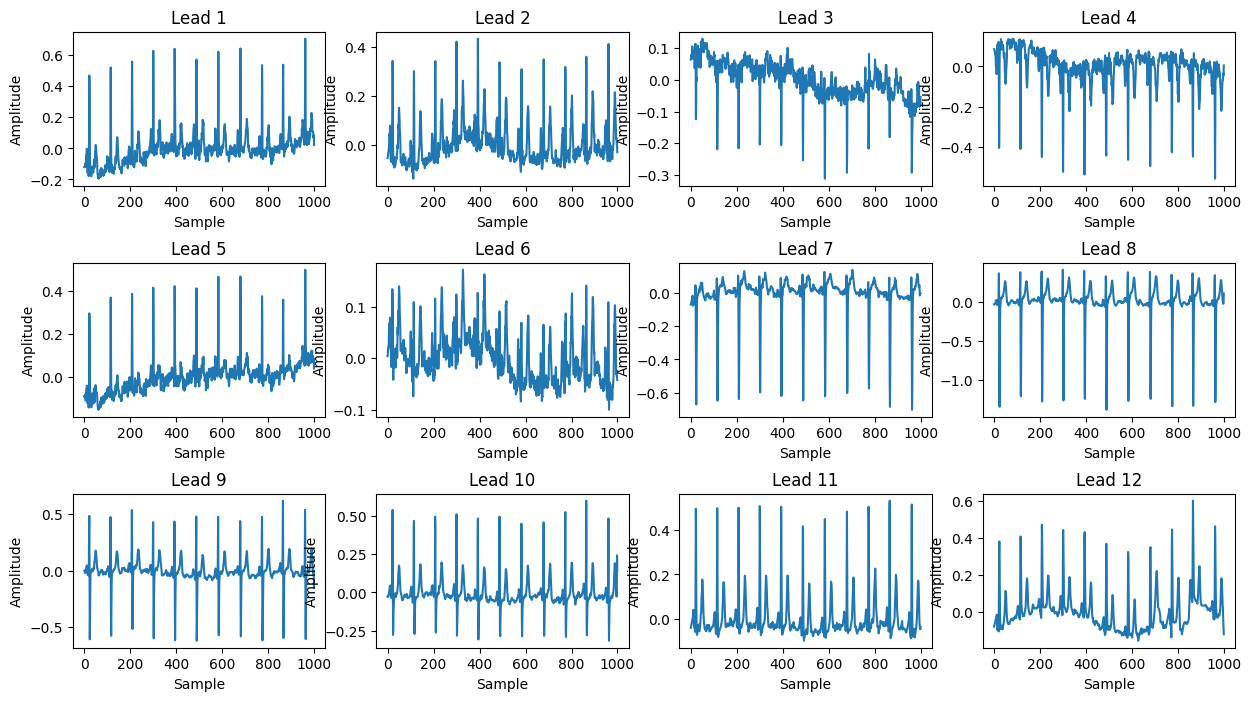

In [6]:
import numpy as np
import matplotlib.pyplot as plt
ecg_data =X_train_raw[0] 
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.plot(ecg_data[:, i])
    ax.set_title(f'Lead {i+1}')
    ax.set_xlabel('Sample')
    ax.set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [18]:
import wfdb
record = wfdb.rdrecord('artifacts/data_ingestion/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/00001_lr', sampto=1000)

annotation = wfdb.rdann('artifacts/data_ingestion/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/00001_lr', 'hea', sampto=1000)

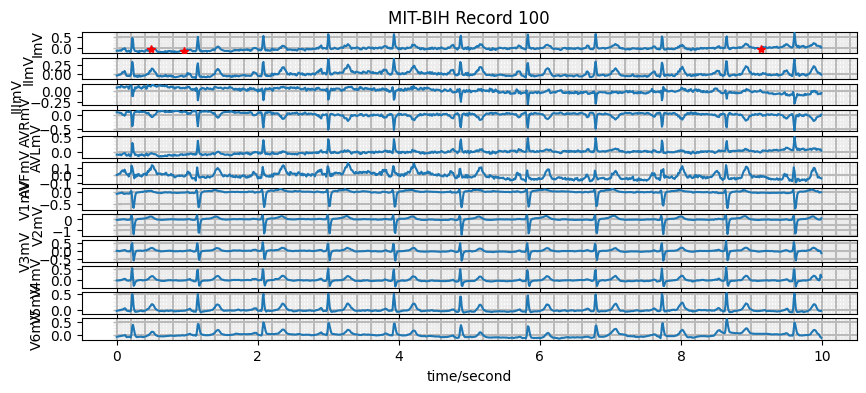

In [21]:
wfdb.plot_wfdb(record=record, annotation=annotation,  time_units='seconds', title='MIT-BIH Record 100',
                   figsize=(10,4), ecg_grids='all')

ValueError: x and y must have same first dimension, but have shapes (1000,) and (12,)

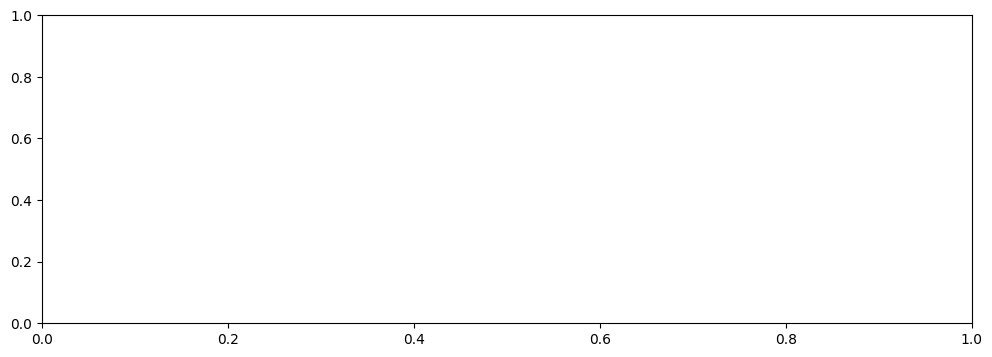

In [9]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

record = wfdb.rdrecord('artifacts/data_ingestion/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/00001_lr') 

ecg_signal = np.sum(ecg_data, axis=0)
print(ecg_signal.shape)


time = np.linspace(0, record.sig_len / record.fs, record.sig_len)
plt.figure(figsize=(12, 4))
plt.plot(time, ecg_signal)
plt.xlabel(xlabel='Time (s)')
plt.ylabel(ylabel='Amplitude (mV)')
plt.title(label='ECG Signal')
plt.show()

# Regular Code

#### Data modification for better accuracy


In [36]:
sam_X_train = np.empty(( 0, X_train_aug_ml.shape[1]))
sam_X_test = np.empty(( 0, X_test_aug_ml.shape[1]))
sam_y_test = np.empty((0,),dtype=y_test_aug_ml.dtype)
sam_y_train = np.empty((0,),dtype=y_train_aug_ml.dtype)
sam_X_train.shape,sam_y_train.shape,sam_X_test.shape

((0, 12000), (0,), (0, 12000))

In [31]:
total_cls = np.unique(y_train_aug_ml)[1:]
total_cls

array([1, 2, 3, 4], dtype=int64)

In [50]:
indicies = np.where(y_train_aug_ml == total_cls[3])[0]
# indicies = indicies[:1000]
indicies.shape,X_test_aug_ml.shape,len(indicies)
# X_test_aug_ml[indicies-1]

((1415,), (1650, 12000), 1415)

In [52]:
# reducre the data remove the norm class
print(X_test_aug_ml.shape, X_train_aug_ml.shape)
print(np.unique(y_train_aug_ml, return_counts=True))
total_cls = np.unique(y_train_aug_ml)[1:]
for i in range(len(total_cls)):
    indicies = np.where(y_train_aug_ml == total_cls[i])[0]
    indicies2 = np.where(y_test_aug_ml == total_cls[i])[0]
    indicies = indicies[:1000]
    sam_X_train = np.concatenate((sam_X_train, X_train_aug_ml[indicies]))
    sam_X_test = np.concatenate((sam_X_test, X_test_aug_ml[indicies2]))
    # sam_X_val = np.concatenate((sam_X_val, X_val_aug_ml[indicies]))
    # # sam_y_train = np.concatenate((sam_y_train, y_train_aug_ml[indicies]))
    sam_y_train = np.concatenate((sam_y_train, y_train_aug_ml[indicies]))
    sam_y_test = np.concatenate((sam_y_test, y_test_aug_ml[indicies2]))
    # sam_y_val = np.concatenate((sam_y_val, y_val_aug_ml[indicies]))
    
    
print(sam_X_train.shape,sam_y_train.shape,np.unique(sam_y_train,return_counts=True))
X_train_aug_ml  = sam_X_train
y_train_aug_ml = sam_y_train
X_test_aug_ml = sam_X_test
y_test_aug_ml = sam_y_test
# # test_indi = np.where(y_test_aug_ml != 0 and y_test_aug_ml != 3 and y_test_aug_ml != 4)
# X_test_aug_ml = X_test_aug_ml[test_indi]
# y_test_aug_ml = y_test_aug_ml[test_indi]
print(f"\n\n {np.unique(y_train_aug_ml,return_counts=True)}")
X_test_aug_ml.shape,np.unique(y_test_aug_ml,return_counts=True),np.unique(y_train_aug_ml,return_counts=True)

(1650, 12000) (17957, 12000)
(array([0, 1, 2, 3, 4], dtype=int64), array([7243, 4043, 2903, 2353, 1415], dtype=int64))


(12000, 12000) (4000,) (array([1, 2, 3, 4], dtype=int64), array([1000, 1000, 1000, 1000], dtype=int64))


 (array([1, 2, 3, 4], dtype=int64), array([1000, 1000, 1000, 1000], dtype=int64))


((738, 12000),
 (array([1, 2, 3, 4], dtype=int64), array([256, 242, 184,  56], dtype=int64)),
 (array([1, 2, 3, 4], dtype=int64),
  array([1000, 1000, 1000, 1000], dtype=int64)))

In [23]:
np.unique(y_test_aug_ml,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([109,  28,  29,  26,   8], dtype=int64))

##### IMplementaing all modesl 

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
clf = LogisticRegression()  # You can adjust C and penalty
clf.fit(X_train_aug_ml, y_train_aug_ml)
lr_pred = clf.predict(X_test_aug_ml)
gb_accuracy = accuracy_score(y_test_aug_ml, lr_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("reprot:",classification_report(y_test_aug_ml, lr_pred,zero_division=0))
print("conf:",confusion_matrix(y_test_aug_ml, lr_pred))

Gradient Boosting Accuracy: 0.32926829268292684
reprot:               precision    recall  f1-score   support

           1       0.33      0.47      0.39       256
           2       0.33      0.51      0.40       242
           3       0.00      0.00      0.00       184
           4       0.00      0.00      0.00        56

    accuracy                           0.33       738
   macro avg       0.16      0.24      0.20       738
weighted avg       0.22      0.33      0.27       738

conf: [[120 136   0   0]
 [119 123   0   0]
 [ 96  88   0   0]
 [ 28  28   0   0]]


In [103]:
gb_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
# gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
gb_pred = gb_classifier.predict(X_test_aug_ml)
gb_accuracy = accuracy_score(y_test_aug_ml, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("reprot:",classification_report(y_test_aug_ml, gb_pred,zero_division=0))
print("conf:",confusion_matrix(y_test_aug_ml, gb_pred))

Gradient Boosting Accuracy: 0.4173441734417344
reprot:               precision    recall  f1-score   support

           1       0.41      0.44      0.43       256
           2       0.44      0.42      0.43       242
           3       0.60      0.34      0.43       184
           4       0.25      0.57      0.34        56

    accuracy                           0.42       738
   macro avg       0.42      0.44      0.41       738
weighted avg       0.45      0.42      0.42       738

conf: [[112  91  26  27]
 [ 91 102  10  39]
 [ 58  32  62  32]
 [  9   9   6  32]]


In [104]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier() # Train Decision Tree Classifer
classifier = classifier.fit(X_train_aug_ml,y_train_aug_ml) #Predict the response for test dataset
y_pred = classifier.predict(X_test_aug_ml) # Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test_aug_ml, y_pred))
print("reprot:",classification_report(y_test_aug_ml, y_pred))
print("conf mat:",confusion_matrix(y_test_aug_ml, y_pred))

Accuracy: 0.3048780487804878
reprot:               precision    recall  f1-score   support

           1       0.37      0.28      0.32       256
           2       0.33      0.31      0.32       242
           3       0.29      0.36      0.32       184
           4       0.14      0.21      0.17        56

    accuracy                           0.30       738
   macro avg       0.28      0.29      0.28       738
weighted avg       0.32      0.30      0.31       738

conf mat: [[72 81 74 29]
 [73 75 67 27]
 [39 59 66 20]
 [ 9 14 21 12]]


In [ ]:
voting_classifier = VotingClassifier(
    estimators=[
        ("Random Forest", rf_classifier),
        ("Gradient Boosting", gb_classifier),
        ("AdaBoost", ab_classifier),
    ],
    voting="hard",
)
voting_classifier.fit(X_train_aug_ml, y_train_aug_ml)
voting_pred = voting_classifier.predict(X_test_aug_ml)

voting_accuracy = accuracy_score(y_test_aug_ml, voting_pred)
voting_conf = confusion_matrix(y_test_aug_ml, voting_pred)
print("Voting Classifier Accuracy:", voting_accuracy)
print("Voting Classifier voting_conf:", voting_conf)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_aug_ml, y_train_aug_ml)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# Evaluate the accuracy of the best Random Forest classifier
accuracy = best_rf_classifier.score(X_test_aug_ml, y_test_aug_ml)
print("Accuracy of Random Forest with best parameters:", accuracy)


## Ml Models

### KNN and GB model 


In [7]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# k-Nearest Neighbors (k-NN)
# k = 5  # Define the value of k (number of neighbors)
# knn_classifier = KNeighborsClassifier(n_neighbors=k)
# print("fitting the knn")
# knn_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# # Predictions
# knn_pred = knn_classifier.predict(X_test_aug_ml)

# # Accuracy of k-NN
# knn_accuracy = accuracy_score(y_test_aug_ml, knn_pred)
# print("k-NN Accuracy:", knn_accuracy)

k_values = [1, 3, 5, 7, 9]

best_k = None
best_accuracy = 0

# Evaluate the classifier for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_aug_ml, y_train_aug_ml)
    y_pred = knn.predict(X_val_aug_ml)
    accuracy = accuracy_score(y_val_aug_ml, y_pred)
    print(f"k={k}, Accuracy={accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}, Best Accuracy: {best_accuracy}")


k=1, Accuracy=0.3805742211362248
k=3, Accuracy=0.3323152107513745
k=5, Accuracy=0.30788026878436164
k=7, Accuracy=0.2657299938912645
k=9, Accuracy=0.25045815516188147
Best k: 1, Best Accuracy: 0.3805742211362248


In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, average_precision_score

In [7]:
# Create Decision Tree classifer object
#! final model 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3) # Train Decision Tree Classifer
classifier = classifier.fit(X_train_aug_ml,y_train_aug_ml) #Predict the response for test dataset
y_pred = classifier.predict(X_test_aug_ml) # Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test_aug_ml, y_pred))
print("reprot:",classification_report(y_test_aug_ml, y_pred))
print("conf mat:",confusion_matrix(y_test_aug_ml, y_pred))


Accuracy: 0.5157575757575757
reprot:               precision    recall  f1-score   support

           0       0.60      0.83      0.69       912
           1       0.25      0.34      0.29       256
           2       0.00      0.00      0.00       242
           3       0.00      0.00      0.00       184
           4       0.12      0.05      0.07        56

    accuracy                           0.52      1650
   macro avg       0.19      0.25      0.21      1650
weighted avg       0.37      0.52      0.43      1650

conf mat: [[760 135   0   0  17]
 [167  88   0   0   1]
 [177  64   0   0   1]
 [125  55   0   0   4]
 [ 48   5   0   0   3]]


c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test_aug_ml, y_pred))

In [ ]:
clf = LogisticRegression(max_iter=5000, C=1, penalty='l2')  # You can adjust C and penalty
clf.fit(X_train_pca, y_train_aug_ml)

# 5. Evaluate the model
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test_aug_ml, y_pred))

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_pca, y_train_aug_ml)
# gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
gb_pred = gb_classifier.predict(X_test_pca)
gb_accuracy = accuracy_score(y_test_aug_ml, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("reprot:",classification_report(y_test_aug_ml, gb_pred,zero_division=0))
print("conf:",confusion_matrix(y_test_aug_ml, gb_pred))

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_aug_ml)
X_test_scaled = scaler.transform(X_test_aug_ml)

# 3. Perform PCA for dimensionality reduction
pca = PCA(n_components=100)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 4. Train logistic regression model
clf = LogisticRegression(max_iter=1000, C=1, penalty='l2')  # You can adjust C and penalty
clf.fit(X_train_pca, y_train_aug_ml)

# 5. Evaluate the model
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test_aug_ml, y_pred))


KeyboardInterrupt: 

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_aug_ml)
X_test_scaled = scaler.transform(X_test_aug_ml)

# 3. Perform PCA for dimensionality reduction
pca = PCA(n_components=500)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [59]:
clf = LogisticRegression(max_iter=5000, C=1, penalty='l2')  # You can adjust C and penalty
clf.fit(X_train_pca, y_train_aug_ml)

# 5. Evaluate the model
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test_aug_ml, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.83      0.67       912
           1       0.12      0.08      0.10       256
           2       0.20      0.04      0.06       242
           3       0.28      0.09      0.14       184
           4       0.04      0.04      0.04        56

    accuracy                           0.49      1650
   macro avg       0.24      0.21      0.20      1650
weighted avg       0.39      0.49      0.41      1650



In [53]:
gb_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_pca, y_train_aug_ml)
# gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
gb_pred = gb_classifier.predict(X_test_pca)
gb_accuracy = accuracy_score(y_test_aug_ml, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("reprot:",classification_report(y_test_aug_ml, gb_pred,zero_division=0))
print("conf:",confusion_matrix(y_test_aug_ml, gb_pred))

Gradient Boosting Accuracy: 0.5636363636363636


In [16]:
from sklearn.linear_model import LogisticRegression
#! final model 
lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train_aug_ml,y_train_aug_ml)

y_pred_lr = lr_model.predict(X_test_aug_ml) # Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test_aug_ml, y_pred_lr))
print("reprot:",classification_report(y_test_aug_ml, y_pred_lr,zero_division=0))
print("conf:",confusion_matrix(y_test_aug_ml, y_pred_lr))


KeyboardInterrupt: 

C:\Users\Ukant\AppData\Local\Temp\ipykernel_3096\137418719.py:293: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


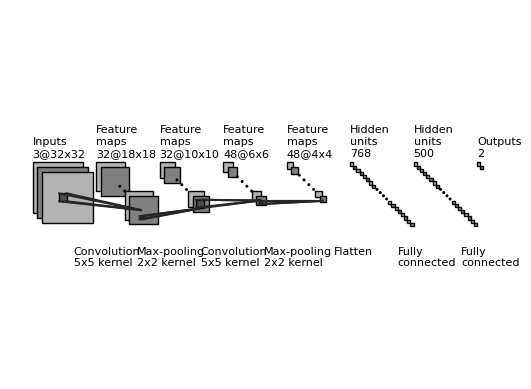

In [60]:
"""
Copyright (c) 2017, Gavin Weiguang Ding
All rights reserved.

Redistribution and use in source and binary forms, with or without
    modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
    list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
    this list of conditions and the following disclaimer in the documentation
    and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors
    may be used to endorse or promote products derived from this software
    without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
    AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
    IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
    ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE
    LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR
    CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF
    SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
    INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN
    CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
    ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
    POSSIBILITY OF SUCH DAMAGE.
"""

import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.0
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.0


def add_layer(
    patches,
    colors,
    size=(24, 24),
    num=5,
    top_left=[0, 0],
    loc_diff=[3, -3],
):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(
    patches,
    colors,
    size=(24, 24),
    num=5,
    num_max=8,
    num_dots=4,
    top_left=[0, 0],
    loc_diff=[3, -3],
):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    this_num = min(num, num_max)
    start_omit = (this_num - num_dots) // 2
    end_omit = this_num - start_omit
    start_omit -= 1
    for ind in range(this_num):
        if (num > num_max) and (start_omit < ind < end_omit):
            omit = True
        else:
            omit = False

        if omit:
            patches.append(Circle(loc_start + ind * loc_diff + np.array(size) / 2, 0.5))
        else:
            patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))

        if omit:
            colors.append(Black)
        elif ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(
    patches,
    colors,
    start_ratio,
    end_ratio,
    patch_size,
    ind_bgn,
    top_left_list,
    loc_diff_list,
    num_show_list,
    size_list,
):

    start_loc = (
        top_left_list[ind_bgn]
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn])
        + np.array(
            [
                start_ratio[0] * (size_list[ind_bgn][1] - patch_size[1]),
                -start_ratio[1] * (size_list[ind_bgn][0] - patch_size[0]),
            ]
        )
    )

    end_loc = (
        top_left_list[ind_bgn + 1]
        + (num_show_list[ind_bgn + 1] - 1) * np.array(loc_diff_list[ind_bgn + 1])
        + np.array(
            [
                end_ratio[0] * size_list[ind_bgn + 1][1],
                -end_ratio[1] * size_list[ind_bgn + 1][0],
            ]
        )
    )

    patches.append(Rectangle(start_loc, patch_size[1], -patch_size[0]))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]], [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(
        Line2D([start_loc[0] + patch_size[1], end_loc[0]], [start_loc[1], end_loc[1]])
    )
    colors.append(Darker)
    patches.append(
        Line2D([start_loc[0], end_loc[0]], [start_loc[1] - patch_size[0], end_loc[1]])
    )
    colors.append(Darker)
    patches.append(
        Line2D(
            [start_loc[0] + patch_size[1], end_loc[0]],
            [start_loc[1] - patch_size[0], end_loc[1]],
        )
    )
    colors.append(Darker)


def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text, family="sans-serif", size=8)


if __name__ == "__main__":

    fc_unit_size = 2
    layer_width = 40
    flag_omit = True

    patches = []
    colors = []

    fig, ax = plt.subplots()

    ############################
    # conv layers
    size_list = [(32, 32), (18, 18), (10, 10), (6, 6), (4, 4)]
    num_list = [3, 32, 32, 48, 48]
    x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
    text_list = ["Inputs"] + ["Feature\nmaps"] * (len(size_list) - 1)
    loc_diff_list = [[3, -3]] * len(size_list)

    num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list) - 1, -1, -1):
        if flag_omit:
            add_layer_with_omission(
                patches,
                colors,
                size=size_list[ind],
                num=num_list[ind],
                num_max=NumConvMax,
                num_dots=NumDots,
                top_left=top_left_list[ind],
                loc_diff=loc_diff_list[ind],
            )
        else:
            add_layer(
                patches,
                colors,
                size=size_list[ind],
                num=num_show_list[ind],
                top_left=top_left_list[ind],
                loc_diff=loc_diff_list[ind],
            )
        label(
            top_left_list[ind],
            text_list[ind]
            + "\n{}@{}x{}".format(num_list[ind], size_list[ind][0], size_list[ind][1]),
        )

    ############################
    # in between layers
    start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    patch_size_list = [(5, 5), (2, 2), (5, 5), (2, 2)]
    ind_bgn_list = range(len(patch_size_list))
    text_list = ["Convolution", "Max-pooling", "Convolution", "Max-pooling"]

    for ind in range(len(patch_size_list)):
        add_mapping(
            patches,
            colors,
            start_ratio_list[ind],
            end_ratio_list[ind],
            patch_size_list[ind],
            ind,
            top_left_list,
            loc_diff_list,
            num_show_list,
            size_list,
        )
        label(
            top_left_list[ind],
            text_list[ind]
            + "\n{}x{} kernel".format(patch_size_list[ind][0], patch_size_list[ind][1]),
            xy_off=[26, -65],
        )

    ############################
    # fully connected layers
    size_list = [(fc_unit_size, fc_unit_size)] * 3
    num_list = [768, 500, 2]
    num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
    x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
    loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
    text_list = ["Hidden\nunits"] * (len(size_list) - 1) + ["Outputs"]

    for ind in range(len(size_list)):
        if flag_omit:
            add_layer_with_omission(
                patches,
                colors,
                size=size_list[ind],
                num=num_list[ind],
                num_max=NumFcMax,
                num_dots=NumDots,
                top_left=top_left_list[ind],
                loc_diff=loc_diff_list[ind],
            )
        else:
            add_layer(
                patches,
                colors,
                size=size_list[ind],
                num=num_show_list[ind],
                top_left=top_left_list[ind],
                loc_diff=loc_diff_list[ind],
            )
        label(top_left_list[ind], text_list[ind] + "\n{}".format(num_list[ind]))

    text_list = ["Flatten\n", "Fully\nconnected", "Fully\nconnected"]

    for ind in range(len(size_list)):
        label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color * np.ones(3))
        if isinstance(patch, Line2D):
            ax.add_line(patch)
        else:
            patch.set_edgecolor(Black * np.ones(3))
            ax.add_patch(patch)

    plt.tight_layout()
    plt.axis("equal")
    plt.axis("off")
    plt.show()
    fig.set_size_inches(8, 2.5)

    fig_dir = "./"
    fig_ext = ".png"
    fig.savefig(
        os.path.join(fig_dir, "convnet_fig" + fig_ext),
        bbox_inches="tight",
        pad_inches=0,
    )

In [27]:
from sklearn.metrics import roc_auc_score, average_precision_score
import numpy as np

def calculate_auc_scores(true_labels, predicted_probs):
    # Reshape the arrays for compatibility with multi-class classification
    predicted_probs = predicted_probs.reshape(-1, 1) if len(predicted_probs.shape) == 1 else predicted_probs

    # Convert true_labels to binary format for each class
    num_classes = predicted_probs.shape[1]
    true_labels_binary = []
    for i in range(num_classes):
        true_labels_binary_class_i = np.where(true_labels == i, 1, 0)
        true_labels_binary.append(true_labels_binary_class_i)

    # Calculate AUC-PR
    auc_pr = average_precision_score(np.array(true_labels_binary).T, predicted_probs, average='macro')
    
    # For AUC-ROC, we need to compute it per class and then average
    auc_roc_sum = 0
    for i in range(num_classes):
        true_labels_binary_class_i = true_labels_binary[i]  # Binary labels for class i
        predicted_probs_class_i = predicted_probs[:, i]  # Predicted probabilities for class i
        
        # Calculate AUC-ROC for class i
        auc_roc_sum += roc_auc_score(true_labels_binary_class_i, predicted_probs_class_i)
    
    # Average the AUC-ROC scores across all classes
    auc_roc = auc_roc_sum / num_classes
    
    return auc_roc, auc_pr


(0.4702387319925831, 0.5388213348135139)

In [43]:
y_train_aug_dl.shape,y_pred_lr.shape,y_train_aug.shape,y_train_aug_ml.shape

((17957, 5), (1650,), (17957,), (17957,))

In [47]:
calculate_auc_scores(y_test_aug_ml, y_pred_lr)

(0.4702387319925831, 0.5388213348135139)

In [ ]:
from sklearn.linear_model import LogisticRegression
#! final model 
lr_model = LogisticRegression(multi_class='multinomial',)
lr_model.fit(X_train_aug_ml,y_train_aug_ml)

y_pred_lr = lr_model.predict(X_test_aug_ml) # Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test_aug_ml, y_pred_lr))
print("reprot:",classification_report(y_test_aug_ml, y_pred_lr,zero_division=0))
print("conf:",confusion_matrix(y_test_aug_ml, y_pred_lr))


In [5]:


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ab_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# # # Initialize voting classifier
# voting_classifier = VotingClassifier(estimators=[
#     ('Random Forest', rf_classifier),
#     ('Gradient Boosting', gb_classifier),
#     ('AdaBoost', ab_classifier)
# ], voting='hard')  # 'hard' voting: majority rule voting

# Train individual classifiers
# rf_classifier.fit(X_train_aug_ml, y_train_aug_ml)
# gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
ab_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# # Train the voting classifier
# voting_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# Predictions
# rf_pred = rf_classifier.predict(X_test_aug_ml)
# gb_pred = gb_classifier.predict(X_test_aug_ml)
ab_pred = ab_classifier.predict(X_test_aug_ml)
# voting_pred = voting_classifier.predict(X_test_aug_ml)

# Evaluate accuracy of individual classifiers
# rf_accuracy = accuracy_score(y_test_aug_ml, rf_pred)
# gb_accuracy = accuracy_score(y_test_aug_ml, gb_pred)
ab_accuracy = accuracy_score(y_test_aug_ml, ab_pred)
conf = confusion_matrix(y_test_aug_ml, ab_pred)

# voting_accuracy = accuracy_score(y_test_aug_ml, voting_pred)

# print("Random Forest Accuracy:", rf_accuracy)
# print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("AdaBoost confusion matrix:", conf)
# print("Voting Classifier Accuracy:", voting_accuracy)


c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


NameError: name 'confusion_matrix' is not defined

In [7]:
ab_accuracy = accuracy_score(y_test_aug_ml, ab_pred)
conf = confusion_matrix(y_test_aug_ml, ab_pred)
print("AdaBoost Accuracy:", ab_accuracy)
print("AdaBoost confusion matrix:", conf)

AdaBoost Accuracy: 0.5618181818181818
AdaBoost confusion matrix: [[906   4   0   2   0]
 [242  13   0   1   0]
 [237   4   0   1   0]
 [169   7   0   8   0]
 [ 56   0   0   0   0]]


In [5]:
gb_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
gb_pred = gb_classifier.predict(X_test_aug_ml)
gb_accuracy = accuracy_score(y_test_aug_ml, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

In [8]:
voting_classifier = VotingClassifier(
    estimators=[
        ("Random Forest", rf_classifier),
        ("Gradient Boosting", gb_classifier),
        ("AdaBoost", ab_classifier),
    ],
    voting="hard",
)
voting_classifier.fit(X_train_aug_ml, y_train_aug_ml)
voting_pred = voting_classifier.predict(X_test_aug_ml)

voting_accuracy = accuracy_score(y_test_aug_ml, voting_pred)
voting_conf = confusion_matrix(y_test_aug_ml, voting_pred)
print("Voting Classifier Accuracy:", voting_accuracy)
print("Voting Classifier voting_conf:", voting_conf)

c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


TypeError: missing a required argument: 'y_true'

In [23]:
print(classification_report(y_test_aug_ml,voting_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73       912
           1       0.53      0.11      0.19       256
           2       0.00      0.00      0.00       242
           3       0.85      0.18      0.30       184
           4       0.00      0.00      0.00        56

    accuracy                           0.59      1650
   macro avg       0.39      0.26      0.24      1650
weighted avg       0.50      0.59      0.47      1650



In [9]:

voting_accuracy = accuracy_score(y_test_aug_ml, voting_pred)
voting_conf = confusion_matrix(y_test_aug_ml, voting_pred)
print("Voting Classifier Accuracy:", voting_accuracy)
print("Voting Classifier voting_conf:", voting_conf)

Voting Classifier Accuracy: 0.5854545454545454
Voting Classifier voting_conf: [[904   4   0   4   0]
 [223  29   3   1   0]
 [228  13   0   1   0]
 [142   9   0  33   0]
 [ 56   0   0   0   0]]


In [9]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')  # Radial Basis Function (RBF) kernel is commonly used

# Train the classifier
svm_classifier.fit(X_train_aug_ml, y_train_aug_ml)

In [ ]:
svm_pred = svm_classifier.predict(X_test_aug_ml)

svm_accuracy = accuracy_score(y_test_aug_ml, svm_pred)
svm_conf = confusion_matrix(y_test_aug_ml, svm_pred)
svm_report = classification_report(y_test_aug_ml, voting_pred)
print("SVM Classifier Accuracy:", svm_accuracy)
print("SVM Classifier report :", svm_report)
print("SVM Classifier svm_conf:", svm_conf)


NameError: name 'svm_classifier' is not defined

In [12]:
import joblib

joblib.dump(voting_classifier,'./artifacts/model_training/model/ML-Model/votingclassifier.joblib')


['./artifacts/model_training/model/ML-Model/votingclassifier.joblib']

In [10]:
target = ['Norm','MI','ST/T','CD',"HYP"]

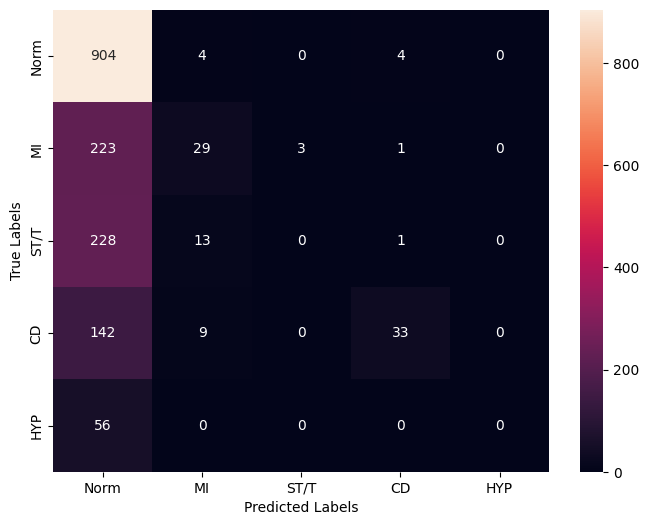

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(voting_conf,annot=True,fmt='d',xticklabels=target,yticklabels=target)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
jj_gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.001, random_state=42)
jj_gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
jj_gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)
jj_gb_pred = jj_gb_classifier.predict(X_test_aug_ml)
jj_gb_accuracy = accuracy_score(y_test_aug_ml, jj_gb_pred)
print("Gradient Boosting Accuracy:", jj_gb_accuracy)



In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_aug_ml, y_train_aug_ml)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# Evaluate the accuracy of the best Random Forest classifier
accuracy = best_rf_classifier.score(X_test_aug_ml, y_test_aug_ml)
print("Accuracy of Random Forest with best parameters:", accuracy)


KeyboardInterrupt: 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform grid search cross-validation for Gradient Boosting
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1, )
gb_grid_search.fit(X_train_aug_ml, y_train_aug_ml)

# Get the best parameters for Gradient Boosting
best_gb_params = gb_grid_search.best_params_
print("Best Parameters for Gradient Boosting:", best_gb_params)

# Train the Gradient Boosting classifier with the best parameters
best_gb_classifier = GradientBoostingClassifier(random_state=42, **best_gb_params)
best_gb_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# Evaluate the accuracy of the best Gradient Boosting classifier
gb_accuracy = best_gb_classifier.score(X_test_aug_ml, y_test_aug_ml)
print("Accuracy of Gradient Boosting with best parameters:", gb_accuracy)

Fitting 10 folds for each of 15625 candidates, totalling 156250 fits


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
# Define the parameter grid for AdaBoost
ab_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Initialize the AdaBoost classifier
ab_classifier = AdaBoostClassifier(random_state=42)

# Perform grid search cross-validation for AdaBoost
ab_grid_search = GridSearchCV(ab_classifier, ab_param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1, early_stopping_rounds=10)
ab_grid_search.fit(X_train_aug_ml, y_train_aug_ml)

# Get the best parameters for AdaBoost
best_ab_params = ab_grid_search.best_params_
print("Best Parameters for AdaBoost:", best_ab_params)

# Train the AdaBoost classifier with the best parameters
best_ab_classifier = AdaBoostClassifier(random_state=42, **best_ab_params)
best_ab_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# Evaluate the accuracy of the best AdaBoost classifier
ab_accuracy = best_ab_classifier.score(X_test_aug_ml, y_test_aug_ml)
print("Accuracy of AdaBoost with best parameters:", ab_accuracy)

In [5]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
print("fitting the naive")
nb_classifier.fit(X_train_aug_ml, y_train_aug_ml)

# Predictions
nb_pred = nb_classifier.predict(X_test_aug_ml)

# Accuracy of Naive Bayes
nb_accuracy = accuracy_score(y_test_aug_ml, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

fitting the naive


Naive Bayes Accuracy: 0.2703030303030303


### OTher model 

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, auc, roc_auc_score, f1_score, average_precision_score,confusion_matrix
import json
import joblib

In [5]:
X_train_ml =  X_train_raw.reshape(-1,12000)
X_test_ml =  X_test_raw.reshape(-1,12000)
X_val_ml =  X_val_raw.reshape(-1,12000)
y_train_ml = y_train_raw
y_test_ml = y_test_raw
y_val_ml = y_val_raw

# X_train  = np.reshape(X_train,12957*1000,12)


print(f"size of X_train {X_train_ml.shape}, size of y_train{y_train_ml.shape}")
print(f"size of X_test {X_test_ml.shape}, size of y_test {y_test_ml.shape}")
print(f"size of X_val {X_val_ml.shape}, size of y_val {y_val_ml.shape}")

number_of_classes = y_test_ml.shape
number_of_classes

size of X_train (12957, 12000), size of y_train(12957,)
size of X_test (1650, 12000), size of y_test (1650,)
size of X_val (1637, 12000), size of y_val (1637,)


(1650,)

In [4]:
y_train_ml = y_train_aug_ml
y_test_ml = y_test_aug_ml
y_val_ml = y_val_aug_ml
X_train_ml = X_train_aug_ml
X_val_ml = X_val_aug_ml
X_test_ml = X_test_aug_ml


In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(
    criterion="entropy", max_depth=5).fit(X_train_ml, y_train_ml)
y_dt_predict = dt_model.predict(X_test_ml)



ValueError: multi_class must be in ('ovo', 'ovr')

In [12]:
dt_metrics = accuracy_score(y_test_ml, y_dt_predict)
dt_report = classification_report(y_test_ml, y_dt_predict, )

c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
y_test_aug_ml.shape, y_dt_predict.shape

((1650,), (1650,))

In [31]:
roc_auc_score(y_test_ml, dt_model.predict_proba(X_test_ml),multi_class='ovo'),


(0.5778815754332836, 0.582297433563796)

In [38]:
dtrs = {}
dir_path = "./artifacts/model_testing/ml_model_results/decision-tree/"
dtrs['accuracy_score'] = dt_metrics
dtrs['dt_report'] = dt_report
dtrs['f1_score'] = f1_score(y_test_ml, y_dt_predict,average='macro')
dtrs['average_precision_score'] = average_precision_score(y_test_ml, dt_model.predict_proba(X_test_ml))
dtrs['roc_auc_score'] = roc_auc_score(y_test_ml, dt_model.predict_proba(X_test_ml),multi_class='ovr')

with open(dir_path+'results.json', "w") as f:
    json.dump(dtrs,f,indent=4)
    
joblib.dump(dt_model, dir_path+"decistion-tree-model.joblib" )

['./artifacts/model_testing/ml_model_results/decision-tree/decistion-tree-model.joblib']

Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for training set')

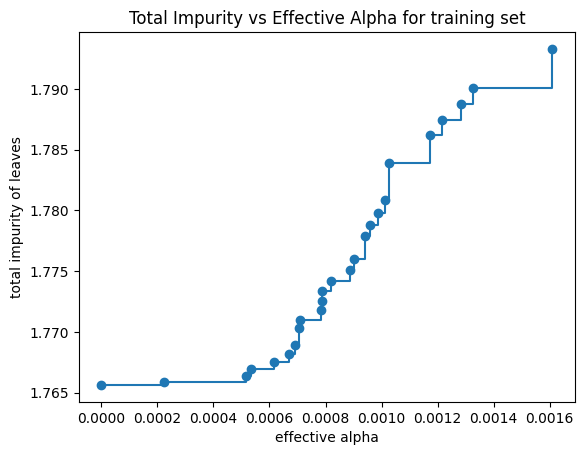

In [15]:
import matplotlib.pyplot as plt
# Computing the cost-complexity prunining path
prune_path = dt_model.cost_complexity_pruning_path(X_train_ml, y_train_ml)
ccp_alphas, impurities = prune_path.ccp_alphas, prune_path.impurities
# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

In [ ]:
# Prune the tree using weakest link pruning
while True:
    # Find the weakest link
    weakest_link = np.argmin(dt_model.tree_.impurity)
    if weakest_link == 0:
        break
    # Prune the weakest link
    dt_model.tree_.children_left[weakest_link] = dt_model.tree_.children_right[
        weakest_link
    ] = -1
    # Re-fit the tree
    dt_model.fit(X_train_ml, y_train_ml)

In [20]:
# Find the optimal value for ccp_apha
opti_ccp_alpha = ccp_alphas[np.argmin(impurities)]
# tt = {"ccp_alpha":opti_ccp_alpha}
print(opti_ccp_alpha)
# dt_model.set_params(tt)
# _ccp_alpha(opti_ccp_alpha)
# dt_model(X_train_ml,y_train_ml)

# prune_path = dt_model.cost_complexity_pruning_path(X_train_ml,y_train_ml)
# ccp_alphas, impurities = prune_path.ccp_alphas, prune_path.impurities
# # Plot the pruning path
# fig, ax = plt.subplots()
# ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
# ax.set_xlabel("effective alpha")
# ax.set_ylabel("total impurity of leaves")
# ax.set_title("Total Impurity vs Effective Alpha for training set")

0.0


#### analysing 

<Axes: ylabel='Count'>

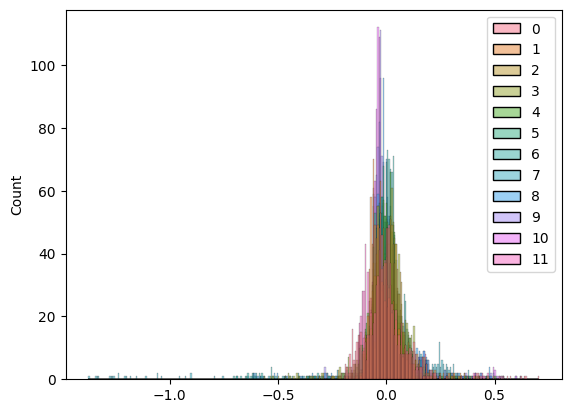

In [20]:
sns.histplot(X_train_aug[0])

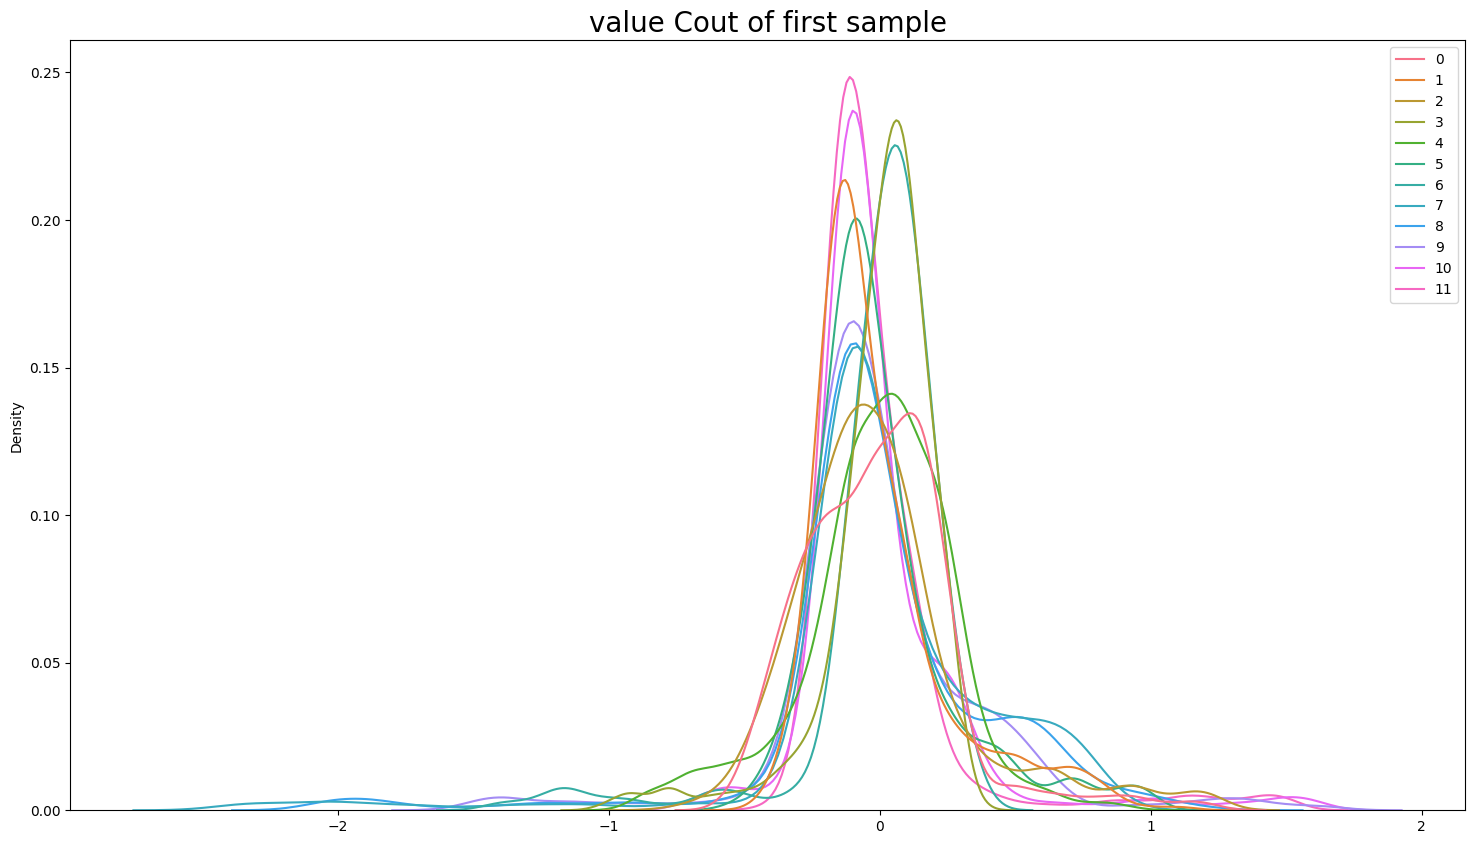

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(18, 10), facecolor='w')
sns.kdeplot(X_train_raw[1110])
plt.title('value Cout of first sample', fontsize=20)
plt.show()

C:\Users\Ukant\AppData\Local\Temp\ipykernel_6420\1657243380.py:9: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(new_data,palette= sns.color_palette("husl"))


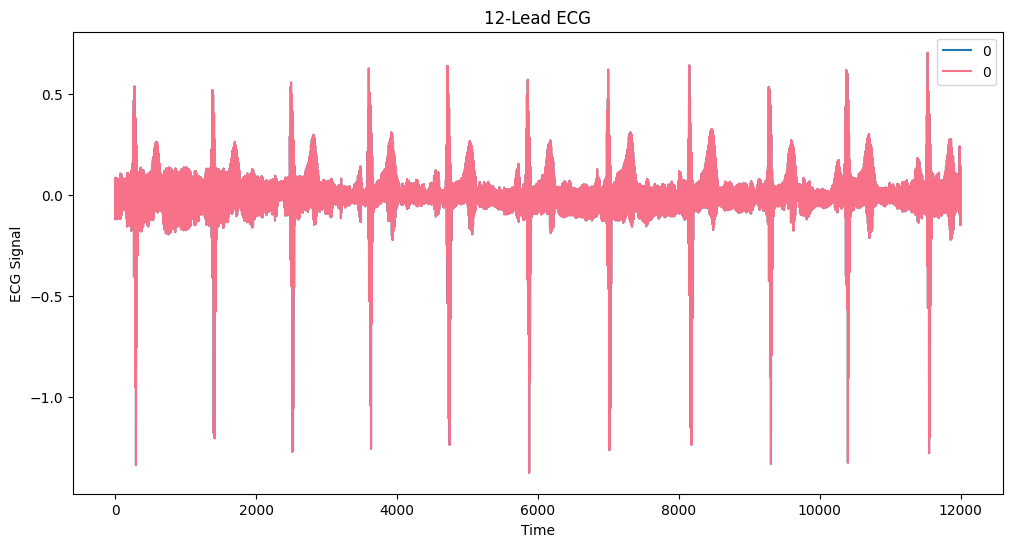

In [32]:
combined_data = X_train_aug[0].reshape(-1, 1)  # Reshape to (12000, 1)
new_data = X_train_raw[0].reshape(-1,1)
# Create a time axis
time_axis = np.arange(combined_data.shape[0])

# Plot the ECG data as a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(combined_data)
sns.lineplot(new_data,palette= sns.color_palette("husl"))
plt.xlabel('Time')
plt.ylabel('ECG Signal')
plt.title('12-Lead ECG')
plt.show()

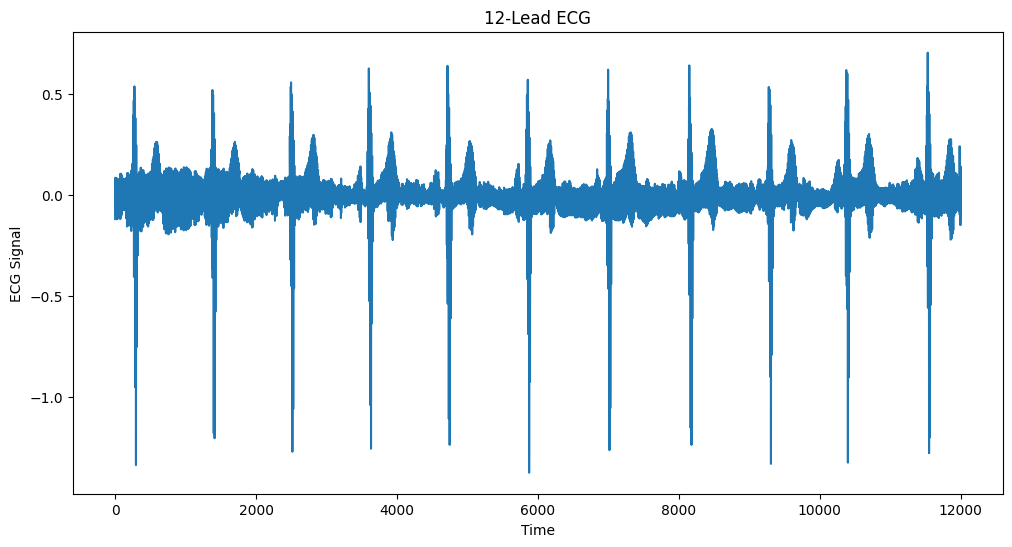

In [30]:
combined_data = X_train_aug[0].reshape(-1, 1)  # Reshape to (12000, 1)

# Create a time axis
time_axis = np.arange(combined_data.shape[0])

# Plot the ECG data as a line graph
plt.figure(figsize=(12, 6))
plt.plot(time_axis, combined_data)
plt.xlabel('Time')
plt.ylabel('ECG Signal')
plt.title('12-Lead ECG')
plt.show()

In [25]:
X_train_aug[0].shape[0]

1000

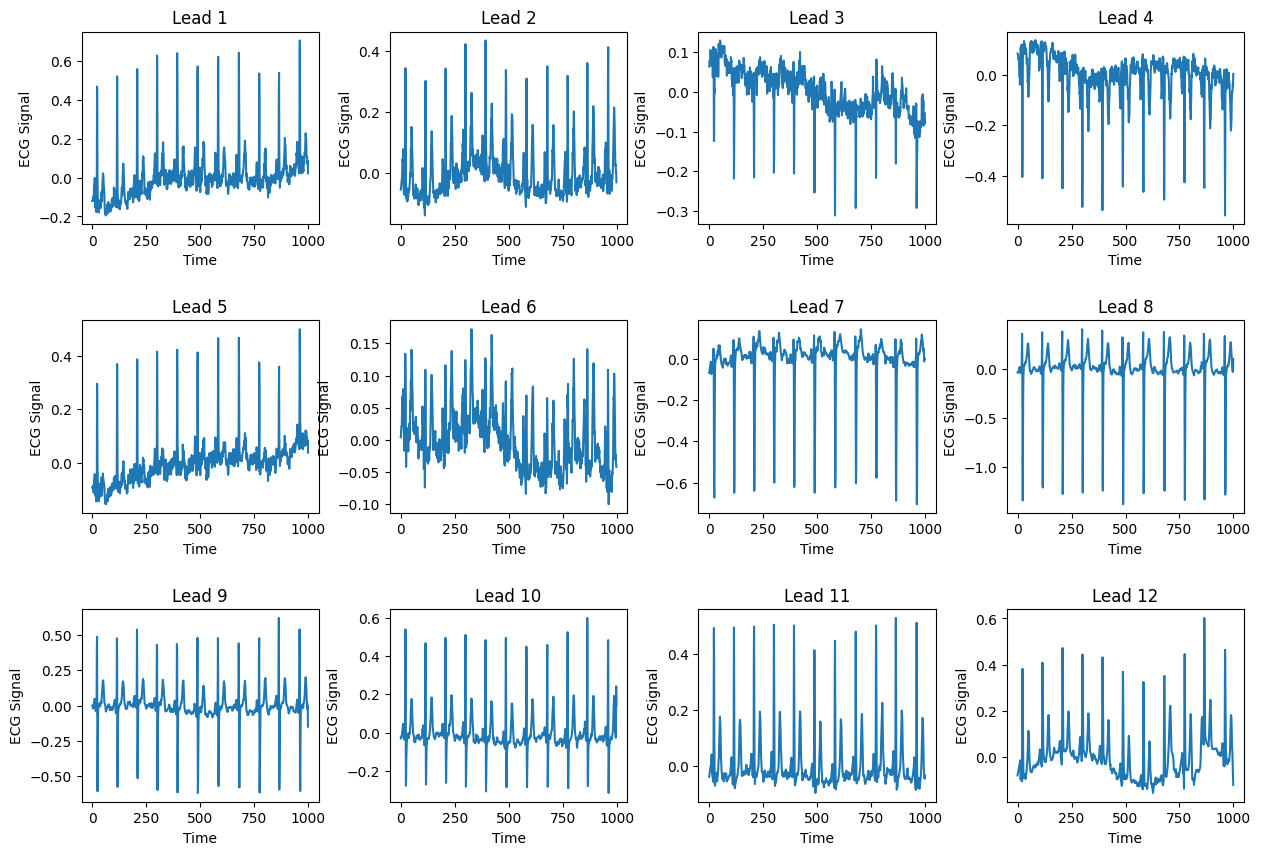

In [26]:
time_axis = np.arange(X_train_aug[0].shape[0])
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axs = axs.flatten() 

for i, ax in enumerate(axs):
    lead_data = X_train_aug[0][:, i]
    ax.plot(time_axis, lead_data)
    ax.set_title(f'Lead {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('ECG Signal')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Text(0, 0.5, 'feq')

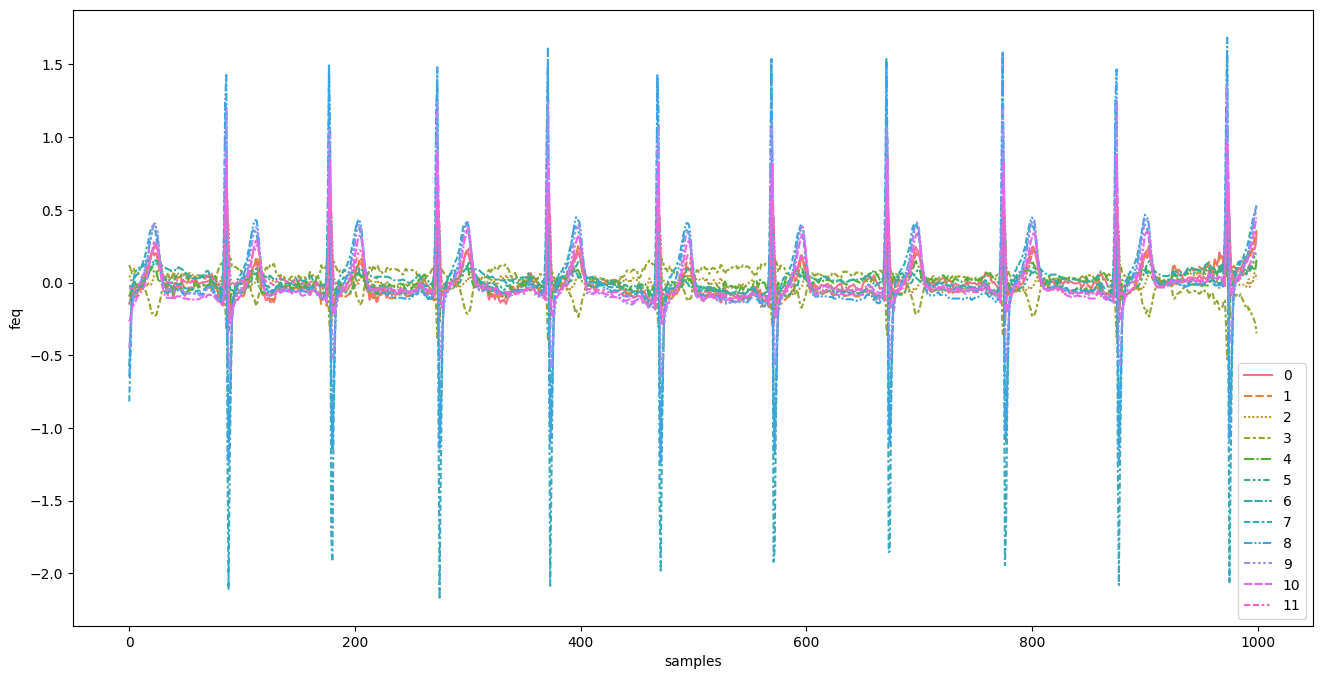

In [22]:
plt.figure(figsize=(16,8))
sns.lineplot(X_test_raw[0])
plt.xlabel("samples")
plt.ylabel("feq")

#### ML model code

In [27]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
m1 = "LogisticRegerssionCV"
lr = LogisticRegressionCV(random_state=10,max_iter=10,cv=5)
model = lr.fit(X_train_ml,y_train_ml)
lr_predict = lr.predict(X_test_ml)
lr_conf = confusion_matrix(y_test_ml, lr_predict)
lr_acc = accuracy_score(y_test_ml,lr_predict)
print("confussion matrix")
print(lr_conf)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc*100,'\n')
print(classification_report(y_test_ml,lr_predict)) 

c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

confussion matrix
[[558 148 107  77  22]
 [145  42  35  28   6]
 [139  42  32  21   8]
 [ 91  39  24  21   9]
 [ 30  12   5   5   4]]


Accuracy of Logistic Regression: 39.81818181818182 

              precision    recall  f1-score   support

           0       0.58      0.61      0.60       912
           1       0.15      0.16      0.16       256
           2       0.16      0.13      0.14       242
           3       0.14      0.11      0.12       184
           4       0.08      0.07      0.08        56

    accuracy                           0.40      1650
   macro avg       0.22      0.22      0.22      1650
weighted avg       0.38      0.40      0.39      1650



In [37]:
dir_path = "./artifacts/model_testing/ml_model_results/logistic-regression/"
lrrs = {}
lrrs['accuracy_score'] = lr_acc
lrrs['roc_auc_score'] = roc_auc_score(y_test_ml, model.predict_proba(X_test_ml) ,multi_class='ovr')
lrrs['classification_report'] = classification_report(y_test_ml, lr_predict)
lrrs['f1_score'] = f1_score(y_test_ml, lr_predict,average='macro')
lrrs['average_precision_score'] = average_precision_score(y_test_ml, model.predict_proba(X_test_ml))

with open(dir_path+'results.json', "w") as f:
    json.dump(lrrs,f,indent=4)
    
joblib.dump(model, dir_path+"logistic-regression-model.joblib" )

['./artifacts/model_testing/ml_model_results/logistic-regression/logistic-regression-model.joblib']

In [ ]:
n_estimators = [int(i) for i in np.linspace(start=100,stop=2000,n=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(i) for i in np.linspace(start=10,stop=110,num=11)]
max_depth.append(None)
min_sample_split = [2,5,10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True,False]
random_grid = {'n_estimator':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'bootstrap': bootstrap
            }
print(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(
    estimator = rf,
    cv=3,
    param_distributions=random_grid,n_iter = 100,
    verbose=2,random_state=7,
    n_jobs=-1   
    
    
)
rf_random.fit(X_train_aug_ml,y_train_aug_ml)

In [ ]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(X_train_aug_ml,y_train_aug_ml)
print("Accuracy on training set is : {}".format(rf_hyper.score(X_test_ml,y_train_aug_ml)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(X_test_ml, y_test_ml)))
rf_predicted = rf_hyper.predict(X_test_ml)
rf_acc_score = accuracy_score(y_test_ml, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(y_test_ml, rf_predicted))

In [39]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train_ml, y_train_ml)
y_svm_predict = model_svm.predict(X_test_ml)
svm_metrics = accuracy_score(y_test_ml, y_svm_predict)
svm_report = classification_report(y_test_ml, y_svm_predict)
print(svm_metrics)
print(svm_report)

: 

: 

In [ ]:
dir_path = "./artifacts/model_testing/ml_model_results/svm/"
svmrs = {}
svmrs['accuracy_score'] =  accuracy_score(y_test_ml, y_svm_predict)
svmrs['roc_auc_score'] = roc_auc_score(y_test_ml, model_svm.predict_proba(X_test_ml) ,multi_class='ovr')
svmrs['classification_report'] = classification_report(y_test_ml, lr_predict)
svmrs['f1_score'] = f1_score(y_test_ml, lr_predict,average='macro')
svmrs['average_precision_score'] = average_precision_score(y_test_ml, model_svm.predict_proba(X_test_ml))
svmrs['confusion_matrix'] = confusion_matrix(y_test_ml,y_svm_predict)

with open(dir_path+'results.json', "w") as f:
    json.dump(svmrs,f,indent=4)
    
joblib.dump(model_svm, dir_path+"svm-model.joblib" )

In [5]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(
    n_estimators=10,
    criterion="log_loss",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=None,
    verbose=1,
    warm_start=True,
    class_weight=None,
)

rfc_model.fit(X_train_ml, y_train_ml)
rfc_model.score(X_test_ml, y_test_ml)
rfc_pred = rfc_model.predict(X_test_ml)


0.5375757575757576

In [14]:
dir_path = "./artifacts/model_testing/ml_model_results/random-forest-tree/"
rfcrs = {}
rfcrs['accuracy_score'] =  accuracy_score(y_test_ml, rfc_pred)
rfcrs['roc_auc_score'] = roc_auc_score(y_test_ml, rfc_model.predict_proba(X_test_ml) ,multi_class='ovr')
rfcrs['classification_report'] = classification_report(y_test_ml, rfc_pred)
rfcrs['f1_score'] = f1_score(y_test_ml, rfc_pred,average='macro')
rfcrs['average_precision_score'] = average_precision_score(y_test_ml, rfc_model.predict_proba(X_test_ml))

with open(dir_path+'results.json', "w") as f:
    json.dump(rfcrs,f,indent=4)
    
joblib.dump(rfc_model, dir_path+"random-forest-tree-model.joblib" )

['./artifacts/model_testing/ml_model_results/random-forest-tree/random-forest-tree-model.joblib']

In [15]:
confusion_matrix(y_test_ml,rfc_pred,y_preb=rfc_model.predict_proba)


array([[817,  38,  43,  13,   1],
       [191,  37,  25,   3,   0],
       [202,  21,  16,   3,   0],
       [132,  20,  14,  17,   1],
       [ 52,   2,   2,   0,   0]], dtype=int64)

In [14]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(
    C=0.01, solver='liblinear').fit(X_train_ml, y_train_ml)
y_lr_predict = model_lr.predict(X_test_ml)
lr_metric = accuracy_score(y_lr_predict, y_test_ml)
lr_report = classification_report(y_lr_predict, y_test_ml)
print(lr_metric)
print(lr_report)

0.5527272727272727
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      1650
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.55      1650
   macro avg       0.20      0.11      0.14      1650
weighted avg       1.00      0.55      0.71      1650



c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## DL Models

In [17]:
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical

print(y_train_raw.shape, y_test_raw.shape, y_val_raw.shape)
y_train_raw_dl = to_categorical(y_train_raw, num_classes=5)
y_test_raw_dl = to_categorical(y_test_raw, num_classes=5)
y_val_raw_dl = to_categorical(y_val_raw, num_classes=5)

X_train_raw_dl = X_train_raw
X_test_raw_dl = X_test_raw
X_val_raw_dl = X_val_raw

print(f"size of X_train {X_train_raw_dl.shape}, size of y_train{y_train_raw_dl.shape}")
print(f"size of X_test {X_test_raw_dl.shape}, size of y_test {y_test_raw_dl.shape}")
print(f"size of X_val {X_val_raw_dl.shape}, size of y_val {y_val_raw_dl.shape}")
input_shape = (1000, 12)
print(f"input_shape : {input_shape}")
number_of_classes = y_test_raw_dl.shape[1]
print(f"number_of_classes: {number_of_classes}")

NameError: name 'y_train_raw' is not defined

In [37]:
import tensorflow as tf

from tensorflow.keras.layers import LSTM, LeakyReLU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, GlobalAveragePooling1D, BatchNormalization, ReLU, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau, TensorBoard
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Precision, Recall, AUC, CategoricalAccuracy, F1Score
from scikeras.wrappers import KerasClassifier

import pandas as pd

In [36]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### PRE FInal implementation

In [7]:
np.unique(y_test_aug_ml,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([912, 256, 242, 184,  56], dtype=int64))

In [5]:
# Model with raw data
def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()

    # Increased model capacity and depth
    model.add(Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling1D(pool_size=2))


    model.add(GlobalAveragePooling1D())

    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(num_classes, activation="softmax"))

    return model

input_shape = (1000, 12)
num_classes = 5

model = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
    f1_m
]

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)
# augmentations = [random_shift, random_scaling]
# train_datagen = TimeSeriesDataGenerator(X_train_dl, y_train_dl, batch_size=32, augmentations=augmentations, shuffle=True)

history = model.fit(
    X_train_aug_dl,y_train_aug_dl,
    epochs=10,
    validation_data=(X_val_aug_dl, y_val_aug_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/pre-final1/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
        # TensorBoard("./artifacts/model_training/model/pre-final/logs", update_freq=1),
        # EarlyStopping(monitor="val_categorical_accuracy", patience=10, restore_best_weights=True),
    ],
)



Epoch 1/10


 15/562 [..............................] - ETA: 13:32 - loss: 2.1813 - precision: 0.3317 - recall: 0.1437 - auc: 0.5208 - categorical_accuracy: 0.3167 - accuracy: 0.3167 - f1_m: 0.1971

KeyboardInterrupt: 

### Models from a paper

#### Normal CNN Model, Scinet model, CNN with entropy features

###### scinet model

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Layer


class SincConv1D(Layer):
    def __init__(self, out_channels, kernel_size, stride=1, padding="same", **kwargs):
        super(SincConv1D, self).__init__(**kwargs)
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

    def build(self, input_shape):
        self.in_channels = input_shape[-1]
        self.f1 = self.add_weight(
            name="f1", shape=(self.out_channels,), initializer="uniform", trainable=True
        )
        self.f2 = self.add_weight(
            name="f2", shape=(self.out_channels,), initializer="uniform", trainable=True
        )
        self.kernel = self.add_weight(
            name="kernel",
            shape=(self.kernel_size, self.in_channels, self.out_channels),
            initializer="uniform",
            trainable=False,
        )
        super(SincConv1D, self).build(input_shape)

    def call(self, inputs):
        sinc_kernel = (
            2
            * self.f2
            * tf.math.sin(
                2
                * tf.math.pi
                * self.f2
                * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2)
            )
            / (
                2
                * tf.math.pi
                * self.f2
                * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2)
            )
        )
        sinc_kernel -= (
            2
            * self.f1
            * tf.math.sin(
                2
                * tf.math.pi
                * self.f1
                * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2)
            )
            / (
                2
                * tf.math.pi
                * self.f1
                * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2)
            )
        )
        sinc_kernel = tf.expand_dims(tf.expand_dims(sinc_kernel, axis=1), axis=2)
        outputs = tf.nn.conv1d(
            inputs, sinc_kernel, stride=self.stride, padding=self.padding
        )
        return outputs

In [3]:
import torch.nn as nn
# from sincnet.layers import SincConv1d

class SincNetModel(nn.Module):
    def __init__(self, num_classes=5):
        super(SincNetModel, self).__init__()
        self.sincnet = nn.Sequential(
            SincConv1D(in_channels=12, out_channels=64, kernel_size=251, stride=2, padding=125),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),
            nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Sequential(
            nn.Linear(in_features=256, out_features=256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01),
            nn.Linear(in_features=256, out_features=128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),
            nn.Linear(in_features=128, out_features=num_classes)
        )

    def forward(self, x):
        x = self.sincnet(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Conv1D, GlobalAveragePooling1D, Dense

class SincConv1D(tf.keras.layers.Layer):
    def __init__(self, out_channels, kernel_size, stride=1, padding='same', **kwargs):
        super(SincConv1D, self).__init__(**kwargs)
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

    def build(self, input_shape):
        self.in_channels = input_shape[-1]
        self.f1 = self.add_weight(name='f1',
                                  shape=(self.out_channels,),
                                  initializer='uniform',
                                  trainable=True)
        self.f2 = self.add_weight(name='f2',
                                  shape=(self.out_channels,),
                                  initializer='uniform',
                                  trainable=True)
        self.kernel = self.add_weight(name='kernel',
                                     shape=(self.kernel_size, 1, self.out_channels),
                                     initializer='uniform',
                                     trainable=False)
        super(SincConv1D, self).build(input_shape)

    def call(self, inputs):
        sinc_kernel = 2 * self.f2 * tf.math.sin(2 * tf.math.pi * self.f2 * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2)) / (
                2 * tf.math.pi * self.f2 * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2))
        sinc_kernel -= 2 * self.f1 * tf.math.sin(2 * tf.math.pi * self.f1 * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2)) / (
                2 * tf.math.pi * self.f1 * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2))
        sinc_kernel = tf.expand_dims(tf.expand_dims(sinc_kernel, axis=1), axis=2)
        outputs = tf.nn.conv1d(inputs, sinc_kernel, stride=self.stride, padding=self.padding)
        return outputs

class SincNetModel(tf.keras.Model):
    def __init__(self, num_classes=5):
        super(SincNetModel, self).__init__()
        self.sincnet = Sequential([
            SincConv1D(64, 251, stride=2, padding='same', input_shape=(1000, 12)),
            BatchNormalization(),
            LeakyReLU(alpha=0.01),
            Conv1D(128, 5, strides=1, padding='same'),
            BatchNormalization(),
            LeakyReLU(alpha=0.01),
            Conv1D(256, 5, strides=1, padding='same'),
            BatchNormalization(),
            LeakyReLU(alpha=0.01),
            GlobalAveragePooling1D()
        ])
        self.fc = Sequential([
            Dense(256, activation='LeakyReLU'),
            BatchNormalization(),
            Dense(128, activation='LeakyReLU'),
            BatchNormalization(),
            Dense(num_classes, activation='softmax')
        ])

    def call(self, inputs):
        x = self.sincnet(inputs)
        x = self.fc(x)
        return x

In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


sincnet_model = SincNetModel(num_classes=5)
sincnet_model.compile(
    optimizer=Adam(lr=0.001),
    loss="categorical_crossentropy",
    metrics=[Precision(), Recall(), AUC(multi_label=True), "accuracy", f1_m],
)
model_checkpoint = ModelCheckpoint(
    filepath="./artifacts/model_training/model/ensemble1/{epoch:02d}-{val_loss:.2f}.h5",
    monitor="val_loss",
    save_best_only=True,
)
sincnet_model.fit(
    X_train_aug_dl,
    y_train_aug_dl,
    validation_data=(X_val_aug_dl, y_val_aug_dl),
    epochs=100,
    batch_size=32,
    callbacks=[model_checkpoint],
)

AttributeError: Exception encountered when calling layer "sinc_conv1d" (type SincConv1D).

in user code:

    File "C:\Users\Ukant\AppData\Local\Temp\ipykernel_13840\1846229157.py", line 30, in call  *
        sinc_kernel = 2 * self.f2 * tf.math.sin(2 * tf.math.pi * self.f2 * (tf.range(self.kernel_size, dtype=tf.float32) - self.kernel_size // 2)) / (

    AttributeError: module 'tensorflow._api.v2.math' has no attribute 'pi'


Call arguments received by layer "sinc_conv1d" (type SincConv1D):
  • inputs=tf.Tensor(shape=(None, 1000, 12), dtype=float32)

###### Model with entorpy

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LeakyReLU, Flatten, Dense, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

class ConvNetWithEntropy(tf.keras.Model):
    def __init__(self, num_classes=5, num_features=12):
        super(ConvNetWithEntropy, self).__init__()
        self.num_features = num_features

        self.conv1 = Conv1D(128, 15, strides=2, padding='same', input_shape=(1000, self.num_features))
        self.bn1 = BatchNormalization()
        self.leaky_relu1 = LeakyReLU(alpha=0.01)
        self.dropout1 = Dropout(0.25)
        self.max_pool1 = MaxPooling1D(pool_size=2, strides=2)

        self.conv2 = Conv1D(256, 11, strides=2, padding='same')
        self.bn2 = BatchNormalization()
        self.leaky_relu2 = LeakyReLU(alpha=0.01)
        self.dropout2 = Dropout(0.25)
        self.max_pool2 = MaxPooling1D(pool_size=2, strides=2)

        self.conv3 = Conv1D(512, 7, strides=2, padding='same')
        self.bn3 = BatchNormalization()
        self.leaky_relu3 = LeakyReLU(alpha=0.01)
        self.dropout3 = Dropout(0.25)
        self.max_pool3 = MaxPooling1D(pool_size=2, strides=2)

        self.conv4 = Conv1D(1024, 5, strides=2, padding='same')
        self.bn4 = BatchNormalization()
        self.leaky_relu4 = LeakyReLU(alpha=0.01)
        self.dropout4 = Dropout(0.25)
        self.max_pool4 = MaxPooling1D(pool_size=2, strides=2)

        self.entropy_layers = [Dense(32, input_shape=(1000,), kernel_regularizer=l2(0.001)) for _ in range(self.num_features)]
        self.flatten = Flatten()
        self.fc1 = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))
        self.fc2 = Dense(512, activation='relu', kernel_regularizer=l2(0.001))
        self.fc3 = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))

    def call(self, inputs):
        conv_features = self.conv1(inputs)
        conv_features = self.bn1(conv_features)
        conv_features = self.leaky_relu1(conv_features)
        conv_features = self.dropout1(conv_features)
        conv_features = self.max_pool1(conv_features)

        conv_features = self.conv2(conv_features)
        conv_features = self.bn2(conv_features)
        conv_features = self.leaky_relu2(conv_features)
        conv_features = self.dropout2(conv_features)
        conv_features = self.max_pool2(conv_features)

        conv_features = self.conv3(conv_features)
        conv_features = self.bn3(conv_features)
        conv_features = self.leaky_relu3(conv_features)
        conv_features = self.dropout3(conv_features)
        conv_features = self.max_pool3(conv_features)

        conv_features = self.conv4(conv_features)
        conv_features = self.bn4(conv_features)
        conv_features = self.leaky_relu4(conv_features)
        conv_features = self.dropout4(conv_features)
        conv_features = self.max_pool4(conv_features)

        entropy_features = []
        for i in range(self.num_features):
            entropy_feature = self.entropy_layers[i](inputs[:, :, i])
            entropy_features.append(entropy_feature)

        entropy_features = tf.concat(entropy_features, axis=1)

        combined_features = self.flatten(conv_features)
        combined_features = tf.concat([combined_features, entropy_features], axis=1)

        combined_features = self.fc1(combined_features)
        combined_features = self.fc2(combined_features)
        output = self.fc3(combined_features)

        return output


In [33]:
conv_net_with_entropy = ConvNetWithEntropy(num_classes=5)
conv_net_with_entropy.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=[Precision(), Recall(), AUC(multi_label=True), "accuracy", f1_m],
)

model_checkpoint = ModelCheckpoint(
    filepath="./artifacts/model_training/model/cnn_with_entropy3/{epoch:02d}",
    monitor="val_loss",    save_format="tf",
    save_best_only=True,
)

conv_net_with_entropy.fit(
    X_train_aug_dl,
    y_train_aug_dl,
    validation_data=(X_val_aug_dl, y_val_aug_dl),
    epochs=100,
    batch_size=32,
    callbacks=[model_checkpoint],
)

Epoch 1/100
562/562 [==============================] - ETA: 0s - loss: 2.3122 - precision_8: 0.7162 - recall_8: 0.5287 - auc_8: 0.8537 - accuracy: 0.6351 - f1_m: 0.5989INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\01\assets


INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\01\assets


562/562 [==============================] - 244s 420ms/step - loss: 2.3122 - precision_8: 0.7162 - recall_8: 0.5287 - auc_8: 0.8537 - accuracy: 0.6351 - f1_m: 0.5989 - val_loss: 1.1651 - val_precision_8: 0.7860 - val_recall_8: 0.6976 - val_auc_8: 0.8872 - val_accuracy: 0.7447 - val_f1_m: 0.7404
Epoch 2/100
562/562 [==============================] - ETA: 0s - loss: 1.0231 - precision_8: 0.7835 - recall_8: 0.6685 - auc_8: 0.9178 - accuracy: 0.7351 - f1_m: 0.7201INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\02\assets


INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\02\assets


562/562 [==============================] - 217s 385ms/step - loss: 1.0231 - precision_8: 0.7835 - recall_8: 0.6685 - auc_8: 0.9178 - accuracy: 0.7351 - f1_m: 0.7201 - val_loss: 0.9577 - val_precision_8: 0.7807 - val_recall_8: 0.6610 - val_auc_8: 0.8743 - val_accuracy: 0.7392 - val_f1_m: 0.7157
Epoch 3/100
562/562 [==============================] - ETA: 0s - loss: 0.8626 - precision_8: 0.8055 - recall_8: 0.7072 - auc_8: 0.9358 - accuracy: 0.7634 - f1_m: 0.7519INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\03\assets


INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\03\assets


562/562 [==============================] - 214s 381ms/step - loss: 0.8626 - precision_8: 0.8055 - recall_8: 0.7072 - auc_8: 0.9358 - accuracy: 0.7634 - f1_m: 0.7519 - val_loss: 0.9570 - val_precision_8: 0.7837 - val_recall_8: 0.6775 - val_auc_8: 0.8878 - val_accuracy: 0.7324 - val_f1_m: 0.7267
Epoch 4/100
562/562 [==============================] - ETA: 0s - loss: 0.8009 - precision_8: 0.8212 - recall_8: 0.7390 - auc_8: 0.9449 - accuracy: 0.7835 - f1_m: 0.7770INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\04\assets


INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\04\assets


562/562 [==============================] - 217s 387ms/step - loss: 0.8009 - precision_8: 0.8212 - recall_8: 0.7390 - auc_8: 0.9449 - accuracy: 0.7835 - f1_m: 0.7770 - val_loss: 0.9230 - val_precision_8: 0.7968 - val_recall_8: 0.6781 - val_auc_8: 0.8727 - val_accuracy: 0.7489 - val_f1_m: 0.7320
Epoch 5/100
562/562 [==============================] - 228s 406ms/step - loss: 0.6892 - precision_8: 0.8349 - recall_8: 0.7706 - auc_8: 0.9561 - accuracy: 0.8045 - f1_m: 0.8009 - val_loss: 0.9520 - val_precision_8: 0.7547 - val_recall_8: 0.7104 - val_auc_8: 0.8844 - val_accuracy: 0.7337 - val_f1_m: 0.7322
Epoch 6/100
562/562 [==============================] - ETA: 0s - loss: 0.6357 - precision_8: 0.8468 - recall_8: 0.7898 - auc_8: 0.9614 - accuracy: 0.8201 - f1_m: 0.8165INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\06\assets


INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_with_entropy3\06\assets


562/562 [==============================] - 249s 443ms/step - loss: 0.6357 - precision_8: 0.8468 - recall_8: 0.7898 - auc_8: 0.9614 - accuracy: 0.8201 - f1_m: 0.8165 - val_loss: 0.8436 - val_precision_8: 0.7929 - val_recall_8: 0.7392 - val_auc_8: 0.8858 - val_accuracy: 0.7715 - val_f1_m: 0.7655
Epoch 7/100
562/562 [==============================] - 259s 461ms/step - loss: 0.5730 - precision_8: 0.8584 - recall_8: 0.8154 - auc_8: 0.9691 - accuracy: 0.8392 - f1_m: 0.8363 - val_loss: 0.9238 - val_precision_8: 0.7622 - val_recall_8: 0.6872 - val_auc_8: 0.8783 - val_accuracy: 0.7288 - val_f1_m: 0.7234
Epoch 8/100
562/562 [==============================] - 250s 444ms/step - loss: 0.5555 - precision_8: 0.8751 - recall_8: 0.8390 - auc_8: 0.9744 - accuracy: 0.8573 - f1_m: 0.8563 - val_loss: 1.1359 - val_precision_8: 0.6916 - val_recall_8: 0.6384 - val_auc_8: 0.8427 - val_accuracy: 0.6634 - val_f1_m: 0.6660
Epoch 9/100
562/562 [==============================] - 253s 450ms/step - loss: 0.4687 - pre

KeyboardInterrupt: 

### Ensamble Model with RFDT, CNN 

In [14]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(256,activation='LeakyReLU'))
    model.add(Dense(128,activation='LeakyReLU'))
    model.add(Dense(64,activation='LeakyReLU'))
    model.add(Dense(32,activation='LeakyReLU'))
    model.add(Dense(16, activation='LeakyReLU'))
    model.add(Dense(8, activation='LeakyReLU'))
    model.add(Dense(5, activation='softmax'))

    
    metrics = [Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy(),'accuracy']
    model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=metrics)
    return model 

In [24]:
from sklearn.utils import class_weight

sklearn_wei = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train_ml),y=y_train_ml)
sklearn_wei = dict(enumerate(sklearn_wei))
sklearn_wei

{0: 0.689134336600856,
 1: 0.9897679952409281,
 2: 1.0180297776871303,
 3: 1.146657477601654,
 4: 1.4616105417276721}

In [27]:
y_train_dl.shape

(24957, 5)

In [26]:
np.unique(y_train_dl,return_counts=True)

(array([0., 1.], dtype=float32), array([99828, 24957], dtype=int64))

In [13]:

#? moedl with dropout and regularization
from keras.regularizers import l2

def create_drop_model():
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(256, activation='LeakyReLU', kernel_regularizer=l2(0.04)))
    model.add(Dropout(0.2, seed=43))
    model.add(Dense(128, activation='LeakyReLU', kernel_regularizer=l2(0.04)))
    # model.add(Dropout(0.2, seed=43))
    model.add(Dense(64, activation='LeakyReLU', kernel_regularizer=l2(0.04)))
    # model.add(Dropout(0.2, seed=43))
    model.add(Dense(32, activation='LeakyReLU', kernel_regularizer=l2(0.04)))
    model.add(Dropout(0.2, seed=43))
    model.add(Dense(16, activation='LeakyReLU', kernel_regularizer=l2(0.04)))
    model.add(Dropout(0.2, seed=43))
    model.add(Dense(8, activation='LeakyReLU', kernel_regularizer=l2(0.04)))
    model.add(Dense(5, activation='softmax'))

    
    metrics = [Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy(),'accuracy']
    model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=metrics)
    return model


drop_model = create_drop_model()
# drop_model.summary()



from sklearn.semi_supervised import SelfTrainingClassifier

drop_model = KerasClassifier(model=create_drop_model,verbose=1)
drop_model._estimator_type = "classifier"
self_training_model = SelfTrainingClassifier(drop_model)
history2=drop_model.fit(X_train_aug_dl, y_train_aug_dl, epochs=10, batch_size=100,validation_data=(X_val_dl,y_val_dl))

Epoch 1/10


250/250 [==============================] - 17s 57ms/step - loss: 4.9831 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - auc_2: 0.5063 - categorical_accuracy: 0.2844 - accuracy: 0.2844 - val_loss: 1.6767 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_auc_2: 0.5000 - val_categorical_accuracy: 0.5583 - val_accuracy: 0.5583
Epoch 2/10
250/250 [==============================] - 12s 50ms/step - loss: 1.6553 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - auc_2: 0.4988 - categorical_accuracy: 0.2902 - accuracy: 0.2902 - val_loss: 1.4565 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_auc_2: 0.5000 - val_categorical_accuracy: 0.5583 - val_accuracy: 0.5583
Epoch 3/10
250/250 [==============================] - 13s 51ms/step - loss: 1.5848 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - auc_2: 0.4979 - categorical_accuracy: 0.2902 - accuracy: 0.2902 - val_loss: 1.4275 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_auc_2: 0.5000 

KeyboardInterrupt: 

In [16]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 12000)             0         
                                                                 
 dense_21 (Dense)            (None, 256)               3072256   
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                

In [69]:
checkpoint=ModelCheckpoint(
        filepath='./artifacts/model_training/model/best_model/.{epoch:02d}-{val_acc:.2f}.h5',
        monitor='val_loss', save_best_only=True),
early_stopping=EarlyStopping(monitor='val_loss', min_delta=0.01, patience=1, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
tb_callback = TensorBoard('./artifacts/model_training/model/logs', update_freq=1)

reduce_LOP=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto', min_delta=0.01, cooldown=0, min_lr=0.001)
Callbacks=[checkpoint]

In [31]:
from sklearn.semi_supervised import SelfTrainingClassifier

model = KerasClassifier(model=create_model,verbose=1)
model._estimator_type = "classifier"
self_training_model = SelfTrainingClassifier(model)
history1=model.fit(X_train_aug_dl, y_train_aug_dl, epochs=10, batch_size=100,validation_data=(X_val_dl,y_val_dl),class_weight=sklearn_wei)

Epoch 1/10
250/250 [==============================] - 15s 50ms/step - loss: 1.1776 - precision_6: 0.7853 - recall_6: 0.2138 - auc_6: 0.7865 - categorical_accuracy: 0.4634 - accuracy: 0.4634 - val_loss: 1.6053 - val_precision_6: 0.3765 - val_recall_6: 0.1491 - val_auc_6: 0.5878 - val_categorical_accuracy: 0.3610 - val_accuracy: 0.3610
Epoch 2/10
250/250 [==============================] - 11s 44ms/step - loss: 0.6320 - precision_6: 0.8251 - recall_6: 0.6318 - auc_6: 0.9335 - categorical_accuracy: 0.7425 - accuracy: 0.7425 - val_loss: 1.8062 - val_precision_6: 0.5103 - val_recall_6: 0.3775 - val_auc_6: 0.5987 - val_categorical_accuracy: 0.4569 - val_accuracy: 0.4569
Epoch 3/10
250/250 [==============================] - 11s 43ms/step - loss: 0.3441 - precision_6: 0.8910 - recall_6: 0.8330 - auc_6: 0.9770 - categorical_accuracy: 0.8642 - accuracy: 0.8642 - val_loss: 2.1027 - val_precision_6: 0.5299 - val_recall_6: 0.4704 - val_auc_6: 0.6072 - val_categorical_accuracy: 0.5058 - val_accuracy:

### Lstm Model

In [4]:
from tensorflow.keras.utils import to_categorical

#? augmented data with swt  
X_train_raw = np.load("./artifacts/data_transformation/data_split/X_train.npy")
y_train_raw = np.load("./artifacts/data_transformation/data_split/y_train.npy")
X_test_raw = np.load("./artifacts/data_transformation/data_split/X_test.npy")
y_test_raw = np.load("./artifacts/data_transformation/data_split/y_test.npy")
X_val_raw = np.load("./artifacts/data_transformation/data_split/X_val.npy")
y_val_raw = np.load("./artifacts/data_transformation/data_split/y_val.npy")

X_train_dl = X_train_raw
X_test_dl = X_test_raw
X_val_dl = X_val_raw
y_train_dl = to_categorical(y_train_raw,num_classes=5)
y_test_dl = to_categorical(y_test_raw,num_classes=5)
y_val_dl = to_categorical(y_val_raw,num_classes=5)


print(f"size of X_train {X_train_dl.shape}, size of y_train{y_train_dl.shape}")
print(f"size of X_test {X_test_dl.shape}, size of y_test {y_test_dl.shape}")
print(f"size of X_val {X_val_dl.shape}, size of y_val {y_val_dl.shape}")
np.unique(y_train_raw,return_counts=True)

size of X_train (12957, 1000, 12), size of y_train(12957, 5)
size of X_test (1650, 1000, 12), size of y_test (1650, 5)
size of X_val (1637, 1000, 12), size of y_val (1637, 5)


(array([0, 1, 2, 3, 4], dtype=int64),
 array([7243, 2043, 1903, 1353,  415], dtype=int64))

In [4]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


def build_lstm_model(input_shape, num_classes):# -> Functional | Any:
    model = Sequential()

    # LSTM layers
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(LSTM(256, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(LSTM(512))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Dense layers
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation="softmax"))

    return model


input_shape = (1000, 12)
num_classes = 5

model = build_lstm_model(input_shape, num_classes)

metrics = [Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy(),'accuracy',f1_m]

model.compile(
    loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=metrics
)

# augmentations = [random_shift, random_scaling]
# train_datagen = TimeSeriesDataGenerator(X_train_dl, y_train_dl, batch_size=32, augmentations=augmentations, shuffle=True)

history = model.fit(
    X_train_aug_dl,
    y_train_aug_dl,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_aug_dl, y_val_aug_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/lstm1/.{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
        TensorBoard("./artifacts/model_training/model/lstm1/logs", update_freq=1),
    ],
)

Epoch 1/50


 13/281 [>.............................] - ETA: 2:16:45 - loss: 1.9194 - precision_5: 0.3658 - recall_5: 0.2031 - auc_5: 0.5090 - categorical_accuracy: 0.3065 - accuracy: 0.3065 - f1_m: 0.2608

### large CNN model 

In [32]:
import torch.nn as nn

class LargeBlock(nn.Module):
    def __init__(self):
        super(LargeBlock, self).__init__()
        self.conv1 = nn.Conv1d(1, 1, kernel_size=1)
        self.batchnorm1 = nn.BatchNorm1d(1)
        self.conv2 = nn.Conv1d(1, 5, kernel_size=5, padding=2)
        self.batchnorm2 = nn.BatchNorm1d(5)
        self.conv3 = nn.Conv1d(5, 7, kernel_size=7, padding=3)
        self.batchnorm3 = nn.BatchNorm1d(7)
        self.conv4 = nn.Conv1d(7, 5, kernel_size=5, padding=2)
        self.batchnorm4 = nn.BatchNorm1d(5)
        self.conv5 = nn.Conv1d(5, 1, kernel_size=1)
        self.batchnorm5 = nn.BatchNorm1d(1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.activation(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.activation(x)
        x = self.conv4(x)
        x = self.batchnorm4(x)
        x = self.activation(x)
        x = self.conv5(x)
        x = self.batchnorm5(x)
        x = self.activation(x)
        return x

class SmallBlock(nn.Module):
    def __init__(self):
        super(SmallBlock, self).__init__()
        self.conv1 = nn.Conv1d(1, 7, kernel_size=7, padding=3)
        self.batchnorm1 = nn.BatchNorm1d(7)
        self.activation1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.maxpool1 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv1d(7, 5, kernel_size=5, padding=2)
        self.batchnorm2 = nn.BatchNorm1d(5)
        self.activation2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.maxpool2 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv1d(5, 1, kernel_size=1)
        self.batchnorm3 = nn.BatchNorm1d(1)
        self.activation3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)
        self.maxpool3 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.activation1(x)
        x = self.dropout1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.activation2(x)
        x = self.dropout2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.activation3(x)
        x = self.dropout3(x)
        x = self.maxpool3(x)
        return x

class ECGModel(nn.Module):
    def __init__(self):
        super(ECGModel, self).__init__()
        self.largeblock = LargeBlock()
        self.smallblock = SmallBlock()
        self.globalavgpool = nn.AdaptiveAvgPool1d(1)
        self.dense = nn.Linear(1, 5)

    def forward(self, x):
        x1 = self.largeblock(x)
        x2 = self.smallblock(x)
        x = torch.cat((x1, x2), dim=1)
        x = self.globalavgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dense(x)
        return x

In [44]:
import torch.nn as nn
import torch
input_data = torch.tensor(X_train_dl)  # Convert to PyTorch tensor

model = ECGModel()
output = model(input_data)

# from sklearn.semi_supervised import SelfTrainingClassifier

# model = KerasClassifier(model=create_model,verbose=1)
# model._estimator_type = "classifier"
# self_training_model = SelfTrainingClassifier(model)
# history1=ecg_model.fit(X_train_aug_dl, y_train_aug_dl, epochs=10, batch_size=100,validation_data=(X_val_dl,y_val_dl),class_weight=sklearn_wei)

RuntimeError: Input type (double) and bias type (float) should be the same

In [35]:
import tensorflow as tf

def large_block(inputs):
    inputs = tf.keras.Input(shape=input_shape)
    
    x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv1D(filters=5, kernel_size=5, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv1D(filters=7, kernel_size=7, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv1D(filters=5, kernel_size=5, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    # large_block_output = large_block(inputs)
    # small_block_output = small_block(inputs)
    # x = tf.keras.layers.Concatenate(axis=2)([large_block_output, small_block_output])
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

def small_block(inputs):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv1D(filters=7, kernel_size=7, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = tf.keras.layers.Conv1D(filters=5, kernel_size=5, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

def ecg_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    # large_block_output = large_block(inputs)
    # small_block_output = small_block(inputs)
    # x = tf.keras.layers.Concatenate(axis=2)([large_block_output, small_block_output])
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
input_shape = (1000, 12)
num_classes = 5
ecg_model = large_block(input_shape)

In [42]:
# Example usage
input_shape = (1000, 12)
num_classes = 5
ecg_model1 = small_block(input_shape)
metrics = [Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy(),'accuracy']
ecg_model1.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=metrics)
history1=ecg_model1.fit(X_train_dl, y_train_dl, epochs=50, batch_size=124,validation_data=(X_val_dl,y_val_dl))

Epoch 1/50
202/202 [==============================] - 21s 83ms/step - loss: 1.5481 - precision_7: 0.3279 - recall_7: 8.0138e-04 - auc_7: 0.6531 - categorical_accuracy: 0.2987 - accuracy: 0.2987 - val_loss: 1.4928 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_auc_7: 0.7133 - val_categorical_accuracy: 0.5809 - val_accuracy: 0.5809
Epoch 2/50
202/202 [==============================] - 9s 45ms/step - loss: 1.4974 - precision_7: 0.5561 - recall_7: 0.0216 - auc_7: 0.6832 - categorical_accuracy: 0.3492 - accuracy: 0.3492 - val_loss: 1.3994 - val_precision_7: 0.7000 - val_recall_7: 0.0043 - val_auc_7: 0.7251 - val_categorical_accuracy: 0.5669 - val_accuracy: 0.5669
Epoch 3/50
202/202 [==============================] - 10s 52ms/step - loss: 1.4668 - precision_7: 0.6191 - recall_7: 0.0628 - auc_7: 0.6848 - categorical_accuracy: 0.3785 - accuracy: 0.3785 - val_loss: 1.3297 - val_precision_7: 0.8953 - val_recall_7: 0.0470 - val_auc_7: 0.7336 - val_categorical_accuracy: 0.5657 - va

In [40]:
import pickle
with open('./artifacts/model_training/model/cnn_60_model/history-cnn_60_model.pkl', 'wb') as f:
    pickle.dump(history1.history, f)

In [39]:
ecg_model1.save("./artifacts/model_training/model/cnn_60_model.keras")

In [32]:
metrics = [Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy(),'accuracy']
ecg_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=metrics)
history1=ecg_model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=100,validation_data=(X_val_dl,y_val_dl))

Epoch 1/10
250/250 [==============================] - 35s 87ms/step - loss: 1.3551 - precision_4: 0.8343 - recall_4: 0.0674 - auc_4: 0.7329 - categorical_accuracy: 0.4353 - accuracy: 0.4353 - val_loss: 1.3124 - val_precision_4: 0.7273 - val_recall_4: 0.0098 - val_auc_4: 0.7173 - val_categorical_accuracy: 0.5767 - val_accuracy: 0.5767
Epoch 2/10
250/250 [==============================] - 18s 72ms/step - loss: 1.3369 - precision_4: 0.8742 - recall_4: 0.0855 - auc_4: 0.7331 - categorical_accuracy: 0.4438 - accuracy: 0.4438 - val_loss: 1.2759 - val_precision_4: 0.6901 - val_recall_4: 0.0299 - val_auc_4: 0.7204 - val_categorical_accuracy: 0.5852 - val_accuracy: 0.5852
Epoch 3/10
250/250 [==============================] - 16s 64ms/step - loss: 1.3288 - precision_4: 0.8727 - recall_4: 0.1047 - auc_4: 0.7332 - categorical_accuracy: 0.4448 - accuracy: 0.4448 - val_loss: 1.2984 - val_precision_4: 0.8242 - val_recall_4: 0.0458 - val_auc_4: 0.7079 - val_categorical_accuracy: 0.5638 - val_accuracy:

In [56]:
import tensorflow as tf


def large_block(inputs):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, padding="same")(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv1D(filters=5, kernel_size=5, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv1D(filters=7, kernel_size=7, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv1D(filters=5, kernel_size=5, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    x = tf.keras.layers.Conv1D(filters=7, kernel_size=7, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    
    
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = tf.keras.layers.Conv1D(filters=5, kernel_size=5, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding="same")(x)
    x = tf.keras.layers.Conv1D(filters=1, kernel_size=1, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


# Example usage
input_shape = (1000, 12)
num_classes = 5
large_model = large_block(input_shape)
metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True),
    CategoricalAccuracy(),
    "accuracy",
]
large_model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.01),
    metrics=metrics,
)
history_large_model = large_model.fit(
    X_train_dl,
    y_train_dl,
    epochs=20,
    callbacks = Callbacks,
    batch_size=64,
    validation_data=(X_val_dl, y_val_dl),
    
)

Epoch 1/20
390/390 [==============================] - 34s 70ms/step - loss: 1.5018 - precision_14: 0.8028 - recall_14: 0.0276 - auc_14: 0.6102 - categorical_accuracy: 0.3374 - accuracy: 0.3374 - val_loss: 1.5660 - val_precision_14: 0.6964 - val_recall_14: 0.0238 - val_auc_14: 0.6378 - val_categorical_accuracy: 0.2511 - val_accuracy: 0.2511
Epoch 2/20
390/390 [==============================] - 21s 54ms/step - loss: 1.4451 - precision_14: 0.7873 - recall_14: 0.0438 - auc_14: 0.6589 - categorical_accuracy: 0.3813 - accuracy: 0.3813 - val_loss: 1.2210 - val_precision_14: 1.0000 - val_recall_14: 0.0098 - val_auc_14: 0.6539 - val_categorical_accuracy: 0.5895 - val_accuracy: 0.5895
Epoch 3/20
390/390 [==============================] - 23s 60ms/step - loss: 1.4242 - precision_14: 0.7175 - recall_14: 0.0693 - auc_14: 0.6727 - categorical_accuracy: 0.3937 - accuracy: 0.3937 - val_loss: 1.2028 - val_precision_14: 0.6892 - val_recall_14: 0.4606 - val_auc_14: 0.6590 - val_categorical_accuracy: 0.58

c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


390/390 [==============================] - 24s 61ms/step - loss: 1.4057 - precision_14: 0.6623 - recall_14: 0.0908 - auc_14: 0.6781 - categorical_accuracy: 0.4078 - accuracy: 0.4078 - val_loss: 1.1820 - val_precision_14: 0.7288 - val_recall_14: 0.4038 - val_auc_14: 0.6647 - val_categorical_accuracy: 0.6042 - val_accuracy: 0.6042
Epoch 8/20
390/390 [==============================] - 22s 57ms/step - loss: 1.3990 - precision_14: 0.6479 - recall_14: 0.1067 - auc_14: 0.6846 - categorical_accuracy: 0.4085 - accuracy: 0.4085 - val_loss: 1.1831 - val_precision_14: 0.7634 - val_recall_14: 0.3311 - val_auc_14: 0.6786 - val_categorical_accuracy: 0.6005 - val_accuracy: 0.6005
Epoch 9/20
390/390 [==============================] - 23s 58ms/step - loss: 1.3951 - precision_14: 0.6542 - recall_14: 0.1013 - auc_14: 0.6844 - categorical_accuracy: 0.4146 - accuracy: 0.4146 - val_loss: 1.2377 - val_precision_14: 0.6401 - val_recall_14: 0.5290 - val_auc_14: 0.6470 - val_categorical_accuracy: 0.5693 - val_ac

In [35]:
import numpy as np
from keras.utils import Sequence

class TimeSeriesDataGenerator(Sequence):
    def __init__(self, X, y, batch_size=32, augmentations=[], shuffle=True):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.augmentations = augmentations
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X_batch = [self.X[i] for i in indices]
        y_batch = [self.y[i] for i in indices]

        for augmentation in self.augmentations:
            X_batch = [augmentation(x) for x in X_batch]

        return np.array(X_batch), np.array(y_batch)

    def on_epoch_end(self):
        self.indices = np.arange(len(self.X))
        if self.shuffle:
            np.random.shuffle(self.indices)

def random_shift(x, max_shift=0.1):
    shift = np.random.uniform(-max_shift, max_shift, size=x.shape)
    return x + shift

def random_scaling(x, max_scaling=0.2):
    scaling = np.random.uniform(1 - max_scaling, 1 + max_scaling, size=x.shape)
    return x * scaling

In [6]:
from tensorflow.keras.utils import to_categorical

#? augmented data with swt  
X_train_raw = np.load("./artifacts/data_transformation/data_split/X_train.npy")
y_train_raw = np.load("./artifacts/data_transformation/data_split/y_train.npy")
X_test_raw = np.load("./artifacts/data_transformation/data_split/X_test.npy")
y_test_raw = np.load("./artifacts/data_transformation/data_split/y_test.npy")
X_val_raw = np.load("./artifacts/data_transformation/data_split/X_val.npy")
y_val_raw = np.load("./artifacts/data_transformation/data_split/y_val.npy")

X_train_dl = X_train_raw
X_test_dl = X_test_raw
X_val_dl = X_val_raw
y_train_dl = to_categorical(y_train_raw,num_classes=5)
y_test_dl = to_categorical(y_test_raw,num_classes=5)
y_val_dl = to_categorical(y_val_raw,num_classes=5)


print(f"size of X_train {X_train_dl.shape}, size of y_train{y_train_dl.shape}")
print(f"size of X_test {X_test_dl.shape}, size of y_test {y_test_dl.shape}")
print(f"size of X_val {X_val_dl.shape}, size of y_val {y_val_dl.shape}")
np.unique(y_train_raw,return_counts=True)

size of X_train (12957, 1000, 12), size of y_train(12957, 5)
size of X_test (1650, 1000, 12), size of y_test (1650, 5)
size of X_val (1637, 1000, 12), size of y_val (1637, 5)


(array([0, 1, 2, 3, 4], dtype=int64),
 array([7243, 2043, 1903, 1353,  415], dtype=int64))

In [39]:
# Model with raw data
def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()

    # Increased model capacity and depth
    model.add(Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Dropout(0.4))  # Increased dropout rate

    model.add(GlobalAveragePooling1D())

    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(num_classes, activation="softmax"))

    return model

input_shape = (1000, 12)
num_classes = 5

model = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
    f1_m
]

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)
# augmentations = [random_shift, random_scaling]
# train_datagen = TimeSeriesDataGenerator(X_train_dl, y_train_dl, batch_size=32, augmentations=augmentations, shuffle=True)

history = model.fit(
    X_train_aug_dl,y_train_aug_dl,
    epochs=10,
    validation_data=(X_val_aug_dl, y_val_aug_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/finalCNN10/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
        TensorBoard("./artifacts/model_training/model/finalCNN10/logs", update_freq=1),
        EarlyStopping(monitor="val_categorical_accuracy", patience=10, restore_best_weights=True),
    ],
)

Epoch 1/10
562/562 [==============================] - 982s 2s/step - loss: 0.9905 - precision_13: 0.7247 - recall_13: 0.5234 - auc_13: 0.8526 - categorical_accuracy: 0.6375 - accuracy: 0.6375 - f1_m: 0.6010 - val_loss: 0.7513 - val_precision_13: 0.7765 - val_recall_13: 0.6494 - val_auc_13: 0.8980 - val_categorical_accuracy: 0.7190 - val_accuracy: 0.7190 - val_f1_m: 0.7050
Epoch 2/10
562/562 [==============================] - 943s 2s/step - loss: 0.8003 - precision_13: 0.7827 - recall_13: 0.6320 - auc_13: 0.9021 - categorical_accuracy: 0.7170 - accuracy: 0.7170 - f1_m: 0.6978 - val_loss: 0.9113 - val_precision_13: 0.7039 - val_recall_13: 0.5229 - val_auc_13: 0.9054 - val_categorical_accuracy: 0.6390 - val_accuracy: 0.6390 - val_f1_m: 0.6047
Epoch 3/10
562/562 [==============================] - 1322s 2s/step - loss: 0.7285 - precision_13: 0.8007 - recall_13: 0.6657 - auc_13: 0.9191 - categorical_accuracy: 0.7407 - accuracy: 0.7407 - f1_m: 0.7256 - val_loss: 0.7151 - val_precision_13: 0.8

In [40]:
import pickle
with open('./artifacts/model_training/model/finalCNN10/finalCNN10.pkl', 'wb') as f:
    pickle.dump(history.history, f)
    
# model.save("./artifacts/model_training/model/high_performance_ecgnet")

In [8]:
# Model with raw data
def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()

    # Increased model capacity and depth
    model.add(Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Dropout(0.4))  # Increased dropout rate

    model.add(GlobalAveragePooling1D())

    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(num_classes, activation="softmax"))

    return model

input_shape = (1000, 12)
num_classes = 5

model = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
]

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)
augmentations = [random_shift, random_scaling]
train_datagen = TimeSeriesDataGenerator(X_train_dl, y_train_dl, batch_size=32, augmentations=augmentations, shuffle=True)

history = model.fit(
    train_datagen,
    epochs=100,
    validation_data=(X_val_dl, y_val_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/high_performance_ecgnet/{epoch:02d}-{val_categorical_accuracy:.2f}.h5",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
        TensorBoard("./artifacts/model_training/model/high_performance_ecgnet/logs", update_freq=1),
        EarlyStopping(monitor="val_categorical_accuracy", patience=10, restore_best_weights=True),
    ],
)



Epoch 1/100


405/405 [==============================] - ETA: 0s - loss: 0.9189 - precision: 0.7636 - recall: 0.5877 - auc: 0.8181 - categorical_accuracy: 0.6833 - accuracy: 0.6833

c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


405/405 [==============================] - 693s 2s/step - loss: 0.9189 - precision: 0.7636 - recall: 0.5877 - auc: 0.8181 - categorical_accuracy: 0.6833 - accuracy: 0.6833 - val_loss: 0.8564 - val_precision: 0.7318 - val_recall: 0.6616 - val_auc: 0.8736 - val_categorical_accuracy: 0.7037 - val_accuracy: 0.7037
Epoch 2/100
405/405 [==============================] - 896s 2s/step - loss: 0.7370 - precision: 0.8035 - recall: 0.6799 - auc: 0.8792 - categorical_accuracy: 0.7510 - accuracy: 0.7510 - val_loss: 0.7508 - val_precision: 0.7794 - val_recall: 0.6885 - val_auc: 0.8881 - val_categorical_accuracy: 0.7379 - val_accuracy: 0.7379
Epoch 3/100
405/405 [==============================] - 896s 2s/step - loss: 0.6900 - precision: 0.8152 - recall: 0.6967 - auc: 0.8961 - categorical_accuracy: 0.7603 - accuracy: 0.7603 - val_loss: 0.6664 - val_precision: 0.8006 - val_recall: 0.6964 - val_auc: 0.9111 - val_categorical_accuracy: 0.7489 - val_accuracy: 0.7489
Epoch 4/100
405/405 [===================

In [1]:
import visualkeras
from collections import defaultdict
from PIL import ImageFont

color_map = defaultdict(dict)
color_map[Conv1D]["fill"] = "orange"
# color_map[ZeroPadding1D]['fill'] = 'gray'
color_map[Dropout]["fill"] = "pink"
color_map[MaxPooling1D]["fill"] = "red"
color_map[Dense]["fill"] = "green"
color_map[Flatten]["fill"] = "teal"

font = ImageFont.truetype("arial.ttf", 32)
path = "./artifacts/model_training/model/high_performance_ecgnet1/model_img"
# visualkeras.layered_view(
#     model, to_file="./artifacts/model_training/model/high_performance_ecgnet1/model_img/model.png", type_ignore=[visualkeras.SpacingDummyLayer]
# )

# visualkeras.layered_view(
#     model,
#     to_file="./artifacts/model_training/model/high_performance_ecgnet1/model_img/model_scaling.png",
#     min_xy=10,
#     min_z=10,
#     scale_xy=100,
#     scale_z=100,
#     one_dim_orientation="x",
#     type_ignore=[visualkeras.SpacingDummyLayer],
# )
visualkeras.layered_view(
    model,
    to_file="./artifacts/model_training/model/high_performance_ecgnet1/model_img/model_scaling.png",
    scale_xy=1,
    scale_z=1,
    legend=True,
    max_z=1000,
    type_ignore=[visualkeras.SpacingDummyLayer],
)

# visualkeras.layered_view(model,type_ignore=[visualkeras.SpacingDummyLayer]).show() # display using your system viewer
# visualkeras.layered_view(model, to_file='output.png')

NameError: name 'Conv1D' is not defined

In [6]:
# Model with swt aug data
# ? model 2nd
def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()

    # Increased model capacity and depth
    model.add(
        Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape)
    )
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Dropout(0.4))  # Increased dropout rate

    model.add(GlobalAveragePooling1D())

    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(num_classes, activation="softmax"))

    return model


input_shape = (1000, 12)
num_classes = 5

model = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    # f1_metric,
    "accuracy",
]

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)
# augmentations = [random_shift, random_scaling]
# train_datagen = TimeSeriesDataGenerator(X_train_dl, y_train_dl, batch_size=32, augmentations=augmentations, shuffle=True)

# history = model.fit(
#     X_train_aug_dl,
#     y_train_aug_dl,
#     epochs=50,
#     validation_data=(X_val_dl, y_val_dl),
#     callbacks=[
#         ModelCheckpoint(
#             filepath="./artifacts/model_training/model/aug_ECGnet/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
#             monitor="val_categorical_accuracy",
#             save_best_only=True,
#         ),
#         TensorBoard("./artifacts/model_training/model/aug_ECGnet/logs", update_freq=1),
#         EarlyStopping(
#             monitor="val_categorical_accuracy", patience=10, restore_best_weights=True
#         ),
#     ],
# )

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC, CategoricalAccuracy

def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()

    # Reduced model complexity and added L2 regularization
    model.add(Conv1D(filters=64, kernel_size=11, name='Convolution1', padding="same", input_shape=input_shape, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization(name='Normalization1'))
    model.add(Activation("relu",name='ReLU1'))
    model.add(MaxPooling1D(pool_size=2,name='MaxPolling1'))

    model.add(Conv1D(filters=128,name='Convolution2', kernel_size=7, padding="same", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization(name='Normalization2'))
    model.add(Activation("relu",name='ReLU2'))
    model.add(MaxPooling1D(pool_size=2,name='MaxPolling2'))

    model.add(Conv1D(filters=256,name='Convolution3', kernel_size=5, padding="same", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization(name='Normalization3'))
    model.add(Activation("relu",name='ReLU3'))
    model.add(MaxPooling1D(pool_size=2,name='MaxPolling3'))

    model.add(Dropout(0.3))  # Reduced dropout rate

    model.add(GlobalAveragePooling1D(name='GlobalAveragePooling1'))
    model.add(Dense(256, activation="relu", name='Dense1',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3,name='Dropout1'))
    model.add(Dense(num_classes, name='Output',activation="softmax"))

    return model

input_shape = (1000, 12)
num_classes = 5

model = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
]

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)

# history = model.fit(
#     X_train_aug_dl,
#     y_train_aug_dl,
#     epochs=50,
#     validation_data=(X_val_dl, y_val_dl),
#     callbacks=[
#         ModelCheckpoint(
#             filepath="./artifacts/model_training/model/sim_aug_ECGnet/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
#             monitor="val_categorical_accuracy",
#             save_best_only=True,
#         ),
#         TensorBoard("./artifacts/model_training/model/sim_aug_ECGnet/logs", update_freq=1),
#         EarlyStopping(
#             monitor="val_categorical_accuracy", patience=10, restore_best_weights=True
#         ),
#     ],
# )

In [37]:
# new aug -failed

import numpy as np
from scipy import signal
from scipy.stats import entropy
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D,
    BatchNormalization,
    Activation,
    MaxPooling1D,
    GlobalAveragePooling1D,
    Dropout,
    Dense,
)
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC, CategoricalAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

def extract_ecg_features(ecg_data):
    """
    Extract various time-domain, frequency-domain, and non-linear features from ECG data.
    """
    
    features = []
    print(ecg_data.shape)
    # Time-domain features
    rr_intervals = get_rr_intervals(ecg_data)
    features.append(np.mean(rr_intervals))
    features.append(np.std(rr_intervals))
    features.append(np.max(rr_intervals))
    features.append(np.min(rr_intervals))

    # Frequency-domain features
    freq, psd = signal.welch(ecg_data, fs=500)
    features.append(np.mean(psd))
    features.append(np.std(psd))
    features.append(np.max(psd))

    # Non-linear features
    features.append(entropy(ecg_data.flatten()))
    features.append(hjorth_complexity(ecg_data.flatten()))

    return np.array(features)


from scipy import signal

def detect_r_peaks(ecg_data):
    """
    Detect R-peaks in the ECG data using the find_peaks function from SciPy.
    """
    peaks, _ = signal.find_peaks(ecg_data, distance=100)
    return peaks


def get_rr_intervals(ecg_data):
    """
    Calculate the R-R intervals from the ECG data.
    """
    # Implement R-peak detection algorithm
    r_peaks = detect_r_peaks(ecg_data.flatten())
    rr_intervals = np.diff(r_peaks)
    return rr_intervals


def hjorth_complexity(ecg_data):
    """
    Calculate the Hjorth complexity from the ECG data.
    """
    # Implement Hjorth complexity calculation
    activity = np.var(ecg_data)
    mobility = np.sqrt(np.var(np.gradient(ecg_data)) / activity)
    complexity = np.sqrt(np.var(np.gradient(ecg_data)) / mobility) / mobility
    return complexity



def build_high_performance_ecgnet(input_shape, num_classes):
    model = Sequential()
    input_shape = (input_shape[0], 1)  # (timesteps, features)

    # Reduced model complexity and added L2 regularization
    model.add(
        Conv1D(
            filters=64,
            kernel_size=11,
            padding="same",
            input_shape=input_shape,
            kernel_regularizer=l2(0.001),
        )
    )
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=2))

    model.add(
        Conv1D(filters=128, kernel_size=7, padding="same", kernel_regularizer=l2(0.001))
    )
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=2))

    model.add(
        Conv1D(filters=256, kernel_size=5, padding="same", kernel_regularizer=l2(0.001))
    )
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Dropout(0.3))

    model.add(GlobalAveragePooling1D())
    model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))

    return model


def perform_cross_validation(X, y, model, num_folds=5):
    """
    Perform stratified K-fold cross-validation on the ECGnet model.
    """
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model.fit(
            X_train,
            y_train,
            epochs=50,
            validation_data=(X_val, y_val),
            callbacks=[
                ModelCheckpoint(
                    filepath="./artifacts/model_training/model/featured/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
                    monitor="val_categorical_accuracy",
                    save_best_only=True,
                ),
                TensorBoard(
                    "./artifacts/model_training/model/featured/logs", update_freq=1
                ),
                EarlyStopping(
                    monitor="val_categorical_accuracy",
                    patience=10,
                    restore_best_weights=True,
                ),
            ],
        )

        score = model.evaluate(X_val, y_val)[1]  # Categorical accuracy
        scores.append(score)

    return np.mean(scores)


# Extract Features
print("doing the X_train feature")
# X_train_features = np.load("./artifacts/data_transformation/feature_engi/X_train_features.npy")
X_train_features = np.array([extract_ecg_features(sample) for sample in X_train_raw_dl])
print("doing the X_val feature")
X_val_features = np.array([extract_ecg_features(sample) for sample in X_val_raw_dl])
# X_val_features = np.load("./artifacts/data_transformation/feature_engi/X_val_features.npy")
# X_test_features = np.load("./artifacts/data_transformation/feature_engi/X_test_features.npy")
X_test_features = np.array([extract_ecg_features(sample) for sample in X_test_raw_dl])
print(X_test_features.shape,y_train_raw_dl.shape, X_val_features.shape)
# # Incorporate Features into the Model
input_shape = (X_train_features.shape[1],)
num_classes = 5

model_ecg = build_high_performance_ecgnet(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
]

model_ecg.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)

model_hist = model_ecg.fit(X_train_features, y_train_raw_dl, validation_data=(X_val_features, y_val_raw_dl), epochs=50, batch_size=32)
test_loss, test_acc = model.evaluate(X_test_features, y_test_raw_dl)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

# Train and Evaluate the Model
# cross_val_score = perform_cross_validation(X_train_features, y_train_aug_dl, model_ecg)
# print(f"Cross-Validation Score: {cross_val_score:.4f}")

# Compare performance with and without features
# model_without_features = build_high_performance_ecgnet((1000, 12), num_classes)
# model_without_features.compile(
#     loss="categorical_crossentropy",
#     optimizer=optimizers.Adam(learning_rate=0.001),
#     metrics=metrics,
# )
# cross_val_score_without_features = perform_cross_validation(
#     X_train_aug_dl, y_train_aug_dl, model_without_features
# )
# print(
#     f"Cross-Validation Score (without features): {cross_val_score_without_features:.4f}"
# )

doing the X_train feature
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)


c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\scipy\signal\_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)
(1000, 12)

KeyboardInterrupt: 

In [12]:
model.save("./artifacts/model_training/model/final/CNN/cnn.keras")


In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution1 (Conv1D)       (None, 1000, 64)          8512      
                                                                 
 Normalization1 (BatchNorma  (None, 1000, 64)          256       
 lization)                                                       
                                                                 
 ReLU1 (Activation)          (None, 1000, 64)          0         
                                                                 
 MaxPolling1 (MaxPooling1D)  (None, 500, 64)           0         
                                                                 
 Convolution2 (Conv1D)       (None, 500, 128)          57472     
                                                                 
 Normalization2 (BatchNorma  (None, 500, 128)          512       
 lization)                                            

In [24]:
np.save("./artifacts/data_transformation/feature_engi/X_test_features.npy",X_test_features)
# np.save("./artifacts/data_transformation/feature_engi/X_val_features.npy",X_val_features)

52/52 - 15s - loss: 0.6243 - precision_9: 0.8236 - recall_9: 0.7497 - auc_9: 0.9231 - categorical_accuracy: 0.7933 - accuracy: 0.7933 - 15s/epoch - 288ms/step


ValueError: too many values to unpack (expected 2)

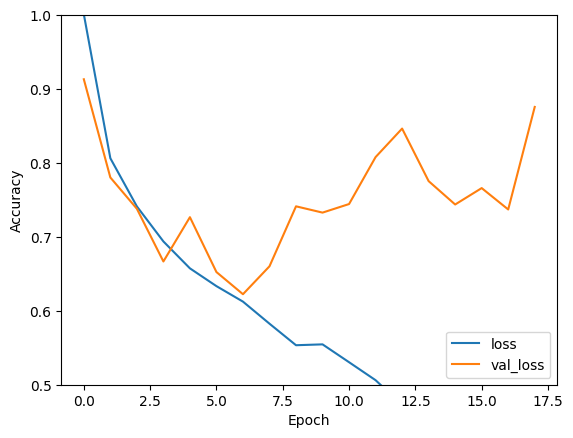

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_dl,  y_test_dl, verbose=2)


In [23]:
import pickle
with open('./artifacts/model_training/model/high_performance_ecgnet/history-norm-cnn.pkl', 'wb') as f:
    pickle.dump(history.history, f)
    
model.save("./artifacts/model_training/model/norm-cnn")

INFO:tensorflow:Assets written to: ./artifacts/model_training/model/norm-cnn\assets


INFO:tensorflow:Assets written to: ./artifacts/model_training/model/norm-cnn\assets


In [81]:
def build_model(input_shape, num_classes):
    model = Sequential()

    # Increase model complexity
    model.add(
        Conv1D(filters=64, kernel_size=7, padding="same", input_shape=input_shape)
    )
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Conv1D(filters=128, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Conv1D(filters=256, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.2))

    # Add more dense layers
    model.add(GlobalAveragePooling1D())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation="softmax"))

    return model


input_shape = (1000, 12)
num_classes = 5

model = build_model(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True),
    CategoricalAccuracy(),
    "accuracy",
]
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)

history = model.fit(
    X_train_dl,
    y_train_dl,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_dl, y_val_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/ensemble1/{epoch:02d}-{val_loss:.2f}.h5",
            monitor="val_loss",
            save_best_only=True,
        ),
        TensorBoard("./artifacts/model_training/model/ensemble1/logs", update_freq=1),
    ],
)

Epoch 1/20
299/390 [======================>.......] - ETA: 10:37 - loss: 1.0845 - precision_19: 0.7110 - recall_19: 0.4183 - auc_19: 0.8429 - categorical_accuracy: 0.5907 - accuracy: 0.5907

KeyboardInterrupt: 

In [ ]:
def build_improved_model(input_shape, num_classes):
    model = Sequential()

    # Increase model capacity
    model.add(Conv1D(filters=128, kernel_size=15, padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=11, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=512, kernel_size=7, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=1024, kernel_size=5, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Dropout(0.3))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation="softmax"))

    return model

input_shape = (1000, 12)
num_classes = 5

model = build_improved_model(input_shape, num_classes)

metrics = [
    Precision(),
    Recall(),
    AUC(multi_label=True, num_labels=num_classes),
    CategoricalAccuracy(),
    "accuracy",
]

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=metrics,
)

history = model.fit(
    X_train_dl,
    y_train_dl,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_dl, y_val_dl),
    callbacks=[
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/improved_ecgnet/{epoch:02d}-{val_categorical_accuracy:.2f}.h5",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        ),
        TensorBoard("./artifacts/model_training/model/improved_ecgnet/logs", update_freq=1),
        EarlyStopping(monitor="val_categorical_accuracy", patience=10, restore_best_weights=True),
    ],
)

In [80]:
import pickle
with open('./artifacts/model_training/model/cnn_80_model1/nee.pkl', 'wb') as f:
    pickle.dump(history.history, f)
    
model.save("./artifacts/model_training/model/cnn_80_model1/nee1")

INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_80_model1/nee1\assets


INFO:tensorflow:Assets written to: ./artifacts/model_training/model/cnn_80_model1/nee1\assets


In [40]:
import tensorflow as tf

def residual_block(inputs, filters, kernel_size):
    x = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    return tf.keras.layers.Add()([inputs, x])

def ecg_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Large block
    x = residual_block(inputs, filters=16, kernel_size=7)
    x = residual_block(x, filters=32, kernel_size=5)
    x = residual_block(x, filters=64, kernel_size=3)
    x = tf.keras.layers.Conv1D(filters=128, kernel_size=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    # Small block
    y = tf.keras.layers.Conv1D(filters=16, kernel_size=7, padding='same')(inputs)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.ReLU()(y)
    y = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(y)
    y = tf.keras.layers.Conv1D(filters=32, kernel_size=5, padding='same')(y)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.ReLU()(y)
    y = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding='same')(y)
    y = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')(y)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.ReLU()(y)
    y = tf.keras.layers.Conv1D(filters=128, kernel_size=1, padding='same')(y)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.ReLU()(y)

    # Concatenate and pool
    z = tf.keras.layers.Concatenate(axis=2)([x, y])
    z = tf.keras.layers.GlobalAveragePooling1D()(z)

    # Output layer
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(z)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
input_shape = (1000, 12)
num_classes = 5
ecg_model = ecg_model(input_shape, num_classes)

ValueError: Inputs have incompatible shapes. Received shapes (1000, 12) and (1000, 16)

### Implementating with the restnet model pretrained model 

In [76]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Average

def build_ensemble_model(input_shape, num_classes):
    # Train multiple models
    model1 = build_model(input_shape, num_classes)
    model2 = build_model(input_shape, num_classes)
    model3 = build_model(input_shape, num_classes)

    model1.fit(X_train_dl, y_train_dl, epochs=50, batch_size=64, validation_data=(X_val_dl, y_val_dl))
    model2.fit(X_train_dl, y_train_dl, epochs=50, batch_size=64, validation_data=(X_val_dl, y_val_dl))
    model3.fit(X_train_dl, y_train_dl, epochs=50, batch_size=64, validation_data=(X_val_dl, y_val_dl))

    # Ensemble the models
    ensemble_input = [model1.output, model2.output, model3.output]
    ensemble_output = Average()(ensemble_input)
    ensemble_model = Model(inputs=[model1.input, model2.input, model3.input], outputs=ensemble_output)

    # Compile the ensemble model
    metrics = [Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy(), "accuracy"]
    ensemble_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001), metrics=metrics)

    return ensemble_model

# Example usage
input_shape = (1000, 12)
num_classes = 5

ensemble_model = build_ensemble_model(input_shape, num_classes)

# Train the ensemble model
history = ensemble_model.fit(
    [X_train_dl, X_train_dl, X_train_dl],
    y_train_dl,
    epochs=50,
    batch_size=64,
    validation_data=([X_val_dl, X_val_dl, X_val_dl], y_val_dl),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=5, restore_best_weights=True
        ),
        TensorBoard("./artifacts/model_training/model/logs/ensamble", update_freq=1),
        ModelCheckpoint(
            filepath="./artifacts/model_training/model/ensamble/.{epoch:02d}-{val_acc:.2f}.h5",
            monitor="val_loss",
            save_best_only=True,
        ),
    ],
)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

#### Adding the stacking 

In [156]:
X_train_ml = X_train_dl.reshape(-1, 12000)
X_test_ml = X_test_dl.reshape(-1, 12000)
X_val_ml = X_val_raw.reshape(-1, 12000)
y_train_ml = y_train_raw
y_test_ml = y_test_raw
X_train_dl.shape, y_train_raw.shape, X_test_dl.shape

((12957, 1000, 12), (12957,), (1650, 1000, 12))

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimator = [
    ("cnn", make_pipeline(model)),
    ("rf", RandomForestClassifier(n_estimators=10, random_state=42)),
]

clf = StackingClassifier(estimators=estimator,final_estimator=LogisticRegression())
clf.fit(X_train_dl,y_train_dl)

405/405 [==============================] - 22s 38ms/step - loss: 1.2974 - precision_31: 0.6176 - recall_31: 0.2924 - auc_31: 0.5197 - categorical_accuracy: 0.5562 - accuracy: 0.5562


ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [174]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_aug_ml, y_train_aug_ml)
cnn_model = model.fit(X_train_aug_dl, y_train_aug_dl, epochs=10, batch_size=100,)

Epoch 1/10
250/250 [==============================] - 15s 46ms/step - loss: 1.1914 - precision_38: 0.7821 - recall_38: 0.2481 - auc_38: 0.7665 - categorical_accuracy: 0.5101 - accuracy: 0.5101
Epoch 2/10
250/250 [==============================] - 12s 48ms/step - loss: 0.6746 - precision_38: 0.8307 - recall_38: 0.6756 - auc_38: 0.9132 - categorical_accuracy: 0.7591 - accuracy: 0.7591
Epoch 3/10
250/250 [==============================] - 11s 45ms/step - loss: 0.4375 - precision_38: 0.8833 - recall_38: 0.8116 - auc_38: 0.9538 - categorical_accuracy: 0.8476 - accuracy: 0.8476
Epoch 4/10
250/250 [==============================] - 11s 46ms/step - loss: 0.3512 - precision_38: 0.9039 - recall_38: 0.8522 - auc_38: 0.9671 - categorical_accuracy: 0.8771 - accuracy: 0.8771
Epoch 5/10
250/250 [==============================] - 11s 45ms/step - loss: 0.3222 - precision_38: 0.9149 - recall_38: 0.8726 - auc_38: 0.9721 - categorical_accuracy: 0.8939 - accuracy: 0.8939
Epoch 6/10
250/250 [===============

In [175]:
#Creating level 1 meta learner - Logistic regresssion 
meta_learner = LogisticRegression(multi_class='multinomial')
meta_train_data = np.column_stack((cnn_model.predict(X_train_aug_dl),rf_model.predict_proba(X_train_aug_ml)))
print(meta_train_data.shape)
meta_learner.fit(meta_train_data, y_train_aug_ml)


780/780 [==============================] - 5s 6ms/step
(24957, 10)


LogisticRegression(multi_class='multinomial')

In [176]:
meta_test_data = np.column_stack((cnn_model.predict(X_test_dl),rf_model.predict_proba(X_test_ml)))
y_pred_ensemble = meta_learner.predict(meta_test_data)
print(y_pred_ensemble.shape,y_test_ml.shape)

52/52 [==============================] - 0s 7ms/step
(1650,) (1650,)


In [177]:
accuracy = accuracy_score(y_test_ml, y_pred_ensemble)
accuracy

0.5824242424242424

In [178]:
class_report = classification_report(y_test_ml, y_pred_ensemble)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.75       912
           1       0.35      0.15      0.21       256
           2       0.38      0.23      0.28       242
           3       0.47      0.25      0.33       184
           4       0.00      0.00      0.00        56

    accuracy                           0.58      1650
   macro avg       0.37      0.31      0.31      1650
weighted avg       0.51      0.58      0.52      1650



#### LSTM model

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC, CategoricalAccuracy

input_size = 12  # Size of input features
hidden_size = 64  # Size of hidden state
num_layers = 2  # Number of LSTM layers
output_size = 5  # Number of classes

# Create the LSTM model
model = Sequential()
model.add(LSTM(hidden_size, input_shape=(None, input_size), return_sequences=True))
model.add(LSTM(hidden_size, return_sequences=False))
model.add(Dense(output_size, activation="softmax"))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=[Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy()],
)
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 64)          19712     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 53061 (207.27 KB)
Trainable params: 53061 (207.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_dl, y_train_dl))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)


In [38]:
model.fit(train_dataset, epochs=10, batch_size=32, validation_data=(X_val_dl, y_val_dl))

Epoch 1/10


KeyboardInterrupt: 

#### Model With Keras Tunner

In [3]:
from keras_tuner.applications import HyperResNet
from keras_tuner.tuners import Hyperband

In [4]:
def build_model(hp):
    inputs = tf.keras.Input(shape=(1000, 12))
    x = inputs
    for i in range(hp.Int("conv_blocks", 3, 5, default=3)):
        filters = hp.Int("filters_" + str(i), 32, 256, step=32)
        for _ in range(2):
            x = tf.keras.layers.Convolution1D(
                filters, kernel_size=3, padding="same"
            )(x)
            # x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.ReLU()(x)
        if hp.Choice("pooling_" + str(i), ["avg", "max"]) == "max":
            x = tf.keras.layers.MaxPool1D()(x)
        else:
            x = tf.keras.layers.AvgPool1D()(x)
    x = tf.keras.layers.GlobalAvgPool1D()(x)
    x = tf.keras.layers.Dense(
        hp.Int("hidden_size", 30, 100, step=10, default=50), activation="relu"
    )(x)
    x = tf.keras.layers.Dropout(
        hp.Float("dropout", 0, 0.5, step=0.1, default=0.5))(x)
    outputs = tf.keras.layers.Dense(5, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [6]:
tuner = Hyperband(
    build_model, objective="val_accuracy", max_epochs=3, hyperband_iterations=4
)

In [8]:
tuner.search(
    X_train_dl,
    y_train_dl,
    validation_data=(X_val_dl, y_val_dl),
    epochs=3,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
)

Trial 19 Complete [00h 02m 37s]
val_accuracy: 0.6212583780288696

Best val_accuracy So Far: 0.7709224224090576
Total elapsed time: 01h 43m 58s

Search: Running Trial #20

Value             |Best Value So Far |Hyperparameter
5                 |4                 |conv_blocks
256               |224               |filters_0
avg               |avg               |pooling_0
192               |256               |filters_1
avg               |max               |pooling_1
32                |64                |filters_2
max               |max               |pooling_2
40                |40                |hidden_size
0.4               |0                 |dropout
0.002788          |0.0010818         |learning_rate
192               |256               |filters_3
avg               |max               |pooling_3
160               |256               |filters_4
max               |avg               |pooling_4
1                 |3                 |tuner/epochs
0                 |1                 |tuner/ini

KeyboardInterrupt: 

In [55]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")
best_hps

KeyError: 'units does not exist.'

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_dl, y_train_dl, epochs=50,
                    validation_data=(X_val_dl, y_val_dl),)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

#### LSTM Model

In [39]:
model01 = Sequential()
dropoutRate = 0.3
model01.add(Conv1D(filters=32, kernel_size=5,
            input_shape=input_shape[1:], activation='relu'))
model01.add(Dropout(dropoutRate))
model01.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model01.add(MaxPooling1D(pool_size=3, strides=2))
model01.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
# model01.add(Dropout(dropoutRate))
# model01.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model01.add(MaxPooling1D(pool_size=3, strides=2))
model01.add(LSTM(5))
model01.add(Dense(units=5, activation="softmax"))
# model01.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.005), metrics=['acc']) #learning_rate 0.01 -> 0.005 -> 0.001 -> 0.0005 => accuracy 0.8935 -> 0.9275 -> 0.94 -> 0.84375
model01.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(
    learning_rate=0.001), metrics=['acc'])  # to change dynamic learning_rate

In [25]:
model01.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 998, 32)           1184      
                                                                 
 dropout_6 (Dropout)         (None, 998, 32)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 996, 32)           3104      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 497, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 495, 64)           6208      
                                                                 
 dropout_7 (Dropout)         (None, 495, 64)           0         
                                                      

In [9]:
history = model01.fit(X_train_dl, y_train_dl, epochs=30,
                      batch_size=32, validation_data=(X_val_dl, y_val_dl))

NameError: name 'model01' is not defined

In [37]:
MODEL_CHECKPOINT = "artifacts/model_training/model/LSTM_model02.keras"

model01.save(MODEL_CHECKPOINT)

#### CNN With keras Tunner



In [5]:
from keras_tuner.tuners import Hyperband

In [4]:
import tensorflow as tf


def build_model_CNN(hp):
    inputs = tf.keras.Input(shape=(1000, 12))
    x = inputs
    for i in range(hp.Int("conv_blocks", 1, 5, default=2)):
        filters = hp.Int("filters_" + str(i), 32, 256, step=32)
        kernel = hp.Int("filters_" + str(i), 2, 6, step=1)
        for _ in range(2):
            x = tf.keras.layers.Convolution1D(
                filters, kernel_size=kernel,
            )(x)
            # x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.ReLU()(x)
        if hp.Choice("pooling_" + str(i), ["avg", "max"]) == "max":
            x = tf.keras.layers.MaxPool1D()(x)
        else:
            x = tf.keras.layers.AvgPool1D()(x)
    # x = tf.keras.layers.GlobalAvgPool1D()(x)
    x = tf.keras.layers.Dense(
        hp.Int("hidden_size", 32, 256, step=32, default=128), activation="relu"
    )(x)
    x = tf.keras.layers.Dropout(
        hp.Float("dropout", 0, 0.5, step=0.1, default=0.5))(x)
    outputs = tf.keras.layers.Dense(5, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        ),
        loss="categorical_crossentropy",
        metrics=['loss', 'prc', 'precision', 'recall', 'auc'],
    )
    return model

In [ ]:
# model02 = Sequential()
# model02.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(1000,12)))
# model02.add(MaxPooling1D(pool_size=2))
# model02.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
# model02.add(MaxPooling1D(pool_size=2))
# model02.add(Flatten())
# model02.add(Dense(128, activation='relu'))
# model02.add(Dropout(0.5))
# model02.add(Dense(5, activation='softmax'))
# model02.summary()

In [7]:
tuner = Hyperband(
    build_model_CNN, objective="val_accuracy", max_epochs=3, hyperband_iterations=2
)

Reloading Tuner from .\untitled_project\tuner0.json


In [8]:
tuner.search(
    X_train_dl,
    y_train_dl,
    validation_data=(X_val_dl, y_val_dl),
    epochs=3,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
    # project_name="test"
)


Search: Running Trial #22

Value             |Best Value So Far |Hyperparameter
5                 |3                 |conv_blocks
64                |96                |filters_0
max               |max               |pooling_0
64                |192               |filters_1
avg               |max               |pooling_1
96                |192               |filters_2
max               |avg               |pooling_2
90                |90                |hidden_size
0.2               |0.2               |dropout
0.00047467        |0.0016688         |learning_rate
64                |64                |filters_3
max               |max               |pooling_3
160               |192               |filters_4
max               |max               |pooling_4
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round





Traceback (most recent call last):
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 430, in _build_hypermodel
    model = super()._build_hypermodel(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ukant\AppData\Local\Temp\ipykernel_13360\2113344457.py", line 11, in build_model_CNN
    x = tf.keras.layers.Convolution1D(
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\Ukant\anaconda3\envs\disease\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 354, in compute_output_shape
    raise ValueError(
ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_5. Consider increasing the input size. Received input shape [None, 60, 96] which would produce output shape with a zero or negative value in a dimension.


### CNN - 5 CONV1D  + lekyrely


In [10]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5,
          activation=LeakyReLU(), input_shape=(1000, 12)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation=LeakyReLU()))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation=LeakyReLU()))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation=LeakyReLU()))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation=LeakyReLU()))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [11]:
MODEL_CHECKPOINT = ""
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=10),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=MODEL_CHECKPOINT, monitor="val_binary_accuracy", save_best_only=True
    ),
]
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(
            num_thresholds=200,
            curve="ROC",
            summation_method="interpolation",
            name="AUC",
            dtype=None,
            thresholds=None,
            multi_label=True,
            label_weights=None,
        ),
    ],
)

history = model.fit(
    X_train_dl,
    y_train_dl,
    epochs=10,
    batch_size=100,
    validation_data=(X_val_dl, y_val_dl),
)


Epoch 1/10


130/130 [==============================] - 57s 412ms/step - loss: 0.9667 - accuracy: 0.6648 - AUC: 0.7608 - val_loss: 0.8117 - val_accuracy: 0.7324 - val_AUC: 0.8662
Epoch 2/10
130/130 [==============================] - 52s 401ms/step - loss: 0.7166 - accuracy: 0.7560 - AUC: 0.8766 - val_loss: 0.7101 - val_accuracy: 0.7593 - val_AUC: 0.8942
Epoch 3/10
130/130 [==============================] - 56s 433ms/step - loss: 0.6304 - accuracy: 0.7816 - AUC: 0.9099 - val_loss: 0.6757 - val_accuracy: 0.7673 - val_AUC: 0.9090
Epoch 4/10
130/130 [==============================] - 55s 425ms/step - loss: 0.5798 - accuracy: 0.7993 - AUC: 0.9257 - val_loss: 0.6672 - val_accuracy: 0.7715 - val_AUC: 0.8990
Epoch 5/10
130/130 [==============================] - 56s 434ms/step - loss: 0.5259 - accuracy: 0.8144 - AUC: 0.9390 - val_loss: 0.6947 - val_accuracy: 0.7618 - val_AUC: 0.9094
Epoch 6/10
130/130 [==============================] - 53s 409ms/step - loss: 0.5482 - accuracy: 0.8047 - AUC: 0.

### CNN

In [18]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation="relu", input_shape=(1000, 12)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 996, 64)           3904      
                                                                 
 max_pooling1d (MaxPooling1  (None, 498, 64)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 494, 128)          41088     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 247, 128)          0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 31616)             0         
                                                                 
 dense (Dense)               (None, 128)              

In [22]:
# MODEL_CHECKPOINT = ""
# callbacks_list = [
#     tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=10),
#     tf.keras.callbacks.ModelCheckpoint(
#         filepath=MODEL_CHECKPOINT, monitor="val_binary_accuracy", save_best_only=True
#     ),
# ]
metrics = [Precision(), Recall(), AUC(multi_label=True), CategoricalAccuracy(),'accuracy']
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=metrics)

history = model.fit(
    X_train_aug_dl,
    y_train_aug_dl,
    epochs=10,
    validation_data=(X_val_aug_dl,y_val_aug_dl),
    batch_size=100,
    callbacks =  ModelCheckpoint(
            filepath="./artifacts/model_training/model/norm-cnn/{epoch:02d}-{val_categorical_accuracy:.2f}.keras",
            monitor="val_categorical_accuracy",
            save_best_only=True,
        )
)

# history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=100, callbacks=callbacks_list, validation_data=(X_val, y_val_encoded))
# test_loss , test_accuracy = model.evaluate(X_test,y_test_encoded)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")
# model01 = tf.keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/10


180/180 [==============================] - 45s 233ms/step - loss: 1.1121 - precision_1: 0.7340 - recall_1: 0.3729 - auc_1: 0.8019 - categorical_accuracy: 0.5809 - accuracy: 0.5809 - val_loss: 0.8095 - val_precision_1: 0.7612 - val_recall_1: 0.6310 - val_auc_1: 0.8620 - val_categorical_accuracy: 0.7166 - val_accuracy: 0.7166
Epoch 2/10
180/180 [==============================] - 43s 238ms/step - loss: 0.6829 - precision_1: 0.8172 - recall_1: 0.6752 - auc_1: 0.9320 - categorical_accuracy: 0.7560 - accuracy: 0.7560 - val_loss: 0.8249 - val_precision_1: 0.7357 - val_recall_1: 0.6378 - val_auc_1: 0.8678 - val_categorical_accuracy: 0.6988 - val_accuracy: 0.6988
Epoch 3/10
180/180 [==============================] - 40s 221ms/step - loss: 0.4562 - precision_1: 0.8735 - recall_1: 0.8000 - auc_1: 0.9688 - categorical_accuracy: 0.8399 - accuracy: 0.8399 - val_loss: 0.8876 - val_precision_1: 0.7537 - val_recall_1: 0.6915 - val_auc_1: 0.8487 - val_categorical_accuracy: 0.7221 - val_accu

In [45]:
MODEL_CHECKPOINT = "artifacts/model_training/model/model02.keras"
model.save(MODEL_CHECKPOINT)

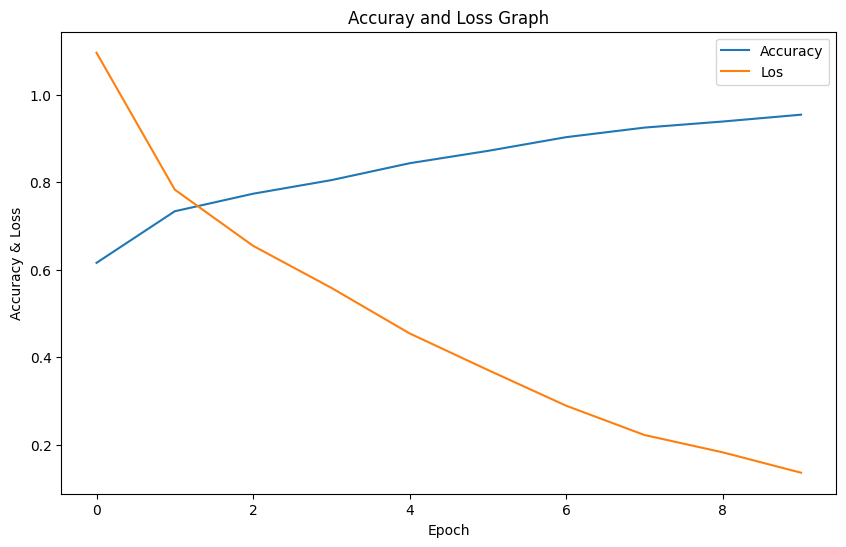

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["loss"], label="Los")
plt.xlabel("Epoch")
plt.ylabel("Accuracy & Loss")
plt.legend()

# Save plot to a file
plot_filename = "./artifacts/model_training/images/accuracy_plot-model_102.png"
plt.savefig(plot_filename)
plt.title("Accuray and Loss Graph")
plt.show()

### CNN with AUC

In [37]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5,
          activation='relu', input_shape=(1000, 12)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 996, 64)           3904      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 498, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_26 (Conv1D)          (None, 494, 128)          41088     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 247, 128)          0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 31616)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [38]:
MODEL_CHECKPOINT = ""
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy", patience=10),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=MODEL_CHECKPOINT, monitor="val_binary_accuracy", save_best_only=True
    ),
]
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        
        tf.keras.metrics.AUC(
            num_thresholds=200,
            curve="ROC",
            summation_method="interpolation",
            name="AUC",
            dtype=None,
            thresholds=None,
            multi_label=True,
            label_weights=None,
        ),
    ],
)

history = model.fit(
    X_train_aug_dl,
    y_train_aug_dl,
    validation=(X_val_aug_dl,y_val_aug_dl)
    epochs=10,
    batch_size=100,
)
# history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=100, callbacks=callbacks_list, validation_data=(X_val, y_val_encoded))
# test_loss , test_accuracy = model.evaluate(X_test,y_test_encoded)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")
# model01 = tf.keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/10
130/130 [==============================] - 30s 211ms/step - loss: 1.0773 - accuracy: 0.6162 - AUC: 0.7062
Epoch 2/10
130/130 [==============================] - 30s 228ms/step - loss: 0.7916 - accuracy: 0.7262 - AUC: 0.8516
Epoch 3/10
130/130 [==============================] - 29s 225ms/step - loss: 0.6591 - accuracy: 0.7710 - AUC: 0.9054
Epoch 4/10
130/130 [==============================] - 29s 224ms/step - loss: 0.5721 - accuracy: 0.8025 - AUC: 0.9293
Epoch 5/10
130/130 [==============================] - 38s 293ms/step - loss: 0.4645 - accuracy: 0.8396 - AUC: 0.9554
Epoch 6/10
130/130 [==============================] - 42s 326ms/step - loss: 0.3738 - accuracy: 0.8710 - AUC: 0.9707
Epoch 7/10
130/130 [==============================] - 44s 335ms/step - loss: 0.2949 - accuracy: 0.8966 - AUC: 0.9822
Epoch 8/10
130/130 [==============================] - 44s 338ms/step - loss: 0.2337 - accuracy: 0.9211 - AUC: 0.9877
Epoch 9/10
130/130 [==============================] - 42s 323ms/

### Conv1D NN

In [ ]:
model.add(Conv1D(filters=64, kernel_size=5,
          activation='relu', input_shape=(1000, 12)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

In [22]:
model02 = Sequential()
model02.add(Conv1D(128, 55, activation='relu', input_shape=input_shape))
# model02.add(MaxPooling1D(10))
model02.add(Dropout(0.5))
model02.add(Conv1D(128, 25, activation='relu'))
model02.add(MaxPooling1D(5))
model02.add(Dropout(0.5))
model02.add(Conv1D(128, 10, activation='relu'))
# model02.add(MaxPooling1D(5))
# model02.add(Dropout(0.5))
# model02.add(Conv1D(128, 5, activation='relu'))
model02.add(GlobalAveragePooling1D())
model02.add(Flatten())
model02.add(Dense(256, kernel_initializer='normal', activation='relu'))
model02.add(Dropout(0.5))
model02.add(Dense(128, kernel_initializer='normal', activation='relu'))
model02.add(Dropout(0.5))
model02.add(Dense(64, kernel_initializer='normal', activation='relu'))
model02.add(Dropout(0.5))
model02.add(Dense(number_of_classes,
            kernel_initializer='normal', activation='softmax'))
model02.summary()
model02.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall', tf.keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name="AUC",
    dtype=None,
    thresholds=None,
    multi_label=True,
    label_weights=None,
)])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 946, 128)          84608     
                                                                 
 dropout_16 (Dropout)        (None, 946, 128)          0         
                                                                 
 conv1d_23 (Conv1D)          (None, 922, 128)          409728    
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 184, 128)          0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 184, 128)          0         
                                                                 
 conv1d_24 (Conv1D)          (None, 175, 128)          163968    
                                                      

In [23]:
hist = model02.fit(X_train_dl, y_train_dl, validation_data=(
    X_val_dl, y_val_dl), batch_size=256, epochs=50, )

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(hist.history).to_csv(path_or_buf="Conv_models/History.csv")
predictions = model02.predict(X_val_dl)
score = accuracy_score(y_val_dl, predictions)
print("Last epoch's validation score is ", score)
df = pd.DataFrame(predictions)